- Para Unidad: Hospitalización convencional y para UCI
- Para el último día registrado 
- Calculamos cuantas camas hay disponibles en cada CCAA, 
cuantas camas están ocupadas por pacientes COVID en 
planta y el % sobre el total

In [ ]:
#Se importan las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Carga del dataset
df = pd.read_csv('C:\\Users\\USER\\Desktop\\Data Science\\edX\\DA Python - UNI VALENCIA\\Módulo 1\\Datos_y_archivos_M1\\Datos_Capacidad_Asistencial_Historico.csv', encoding='latin1', sep=';', parse_dates=['Fecha'], dayfirst=True)

In [ ]:
fecha_ultima=df.iloc[-1,0]

In [ ]:
# Selección y creación de un nuevo DF para casos en el último día.
dfu = pd.DataFrame()
dfu =df[df['Fecha'] == fecha_ultima]

- Camas hay disponibles en cada CCAA

In [8]:
r = pd.DataFrame()

In [9]:
# Camas disponibles ultimo dia
r= dfu[dfu.Unidad == 'Hospitalización convencional'].groupby('CCAA')['TOTAL_CAMAS'].sum().reset_index()

# Camas ocupadas por paciente covid

r['OCUPADAS_COVID'] = (dfu[dfu.Unidad == 'Hospitalización convencional'].groupby('CCAA')['OCUPADAS_COVID19'].sum().reset_index())['OCUPADAS_COVID19']

# % Total

r['% total'] = round((r['OCUPADAS_COVID']/r['TOTAL_CAMAS'])*100, 2)

r

CCAA  TOTAL_CAMAS  OCUPADAS_COVID  % total
0              ANDALUCÍA        15821             489     3.09
1                 ARAGÓN         3959             141     3.56
2               ASTURIAS         3123             116     3.71
3              CANTABRIA         1354              34     2.51
4     CASTILLA LA MANCHA         4553             371     8.15
5        CASTILLA Y LEÓN         6293             419     6.66
6               CATALUÑA        23533            1492     6.34
7                  CEUTA          180              11     6.11
8   COMUNIDAD VALENCIANA        10394             490     4.71
9            EXTREMADURA         2852              72     2.52
10               GALICIA         7645             415     5.43
11        ISLAS BALEARES         3158             149     4.72
12        ISLAS CANARIAS         5112             244     4.77
13              LA RIOJA          670              16     2.39
14                MADRID        15724            1452     9.23
15               MELILLA          165               7     4.24
16                MURCIA         3646             144     3.95
17               NAVARRA         1585              66     4.16
18            PAÍS VASCO         4548             320     7.04

In [10]:
# UCI con respirador
# Camas disponibles ultimo dia
r['UCI_CD'] = (dfu[(dfu.Unidad == 'U. Críticas CON respirador')|(dfu.Unidad == 'U. Críticas SIN respirador')].groupby('CCAA')['TOTAL_CAMAS'].sum().reset_index())['TOTAL_CAMAS']

# Camas ocupadas por paciente covid

r['UCI_OCUPADAS_COVID'] = (dfu[(dfu.Unidad == 'U. Críticas CON respirador')|(dfu.Unidad == 'U. Críticas SIN respirador')].groupby('CCAA')['OCUPADAS_COVID19'].sum().reset_index())['OCUPADAS_COVID19']

# % Total

r['UCI_% total'] = round((r['UCI_OCUPADAS_COVID']/r['UCI_CD'])*100, 2)
r


CCAA  TOTAL_CAMAS  OCUPADAS_COVID  % total  UCI_CD  \
0              ANDALUCÍA        15821             489     3.09    1748   
1                 ARAGÓN         3959             141     3.56     206   
2               ASTURIAS         3123             116     3.71     280   
3              CANTABRIA         1354              34     2.51     118   
4     CASTILLA LA MANCHA         4553             371     8.15     354   
5        CASTILLA Y LEÓN         6293             419     6.66     418   
6               CATALUÑA        23533            1492     6.34    1176   
7                  CEUTA          180              11     6.11      17   
8   COMUNIDAD VALENCIANA        10394             490     4.71     754   
9            EXTREMADURA         2852              72     2.52     182   
10               GALICIA         7645             415     5.43     745   
11        ISLAS BALEARES         3158             149     4.72     330   
12        ISLAS CANARIAS         5112             244     4.77     483   
13              LA RIOJA          670              16     2.39      53   
14                MADRID        15724            1452     9.23    1075   
15               MELILLA          165               7     4.24      17   
16                MURCIA         3646             144     3.95     463   
17               NAVARRA         1585              66     4.16     102   
18            PAÍS VASCO         4548             320     7.04     371   

    UCI_OCUPADAS_COVID  UCI_% total  
0                   27         1.54  
1                    5         2.43  
2                    9         3.21  
3                    4         3.39  
4                   17         4.80  
5                   21         5.02  
6                   83         7.06  
7                    0         0.00  
8                   25         3.32  
9                    1         0.55  
10                  12         1.61  
11                  16         4.85  
12                  17         3.52  
13                   3         5.66  
14                  74         6.88  
15                   0         0.00  
16                   4         0.86  
17                   4         3.92  
18                  18         4.85

-Pequeña Visualización

In [11]:
import matplotlib.pyplot as plt

- Pasamos la columna CCAA

<Axes: xlabel='CCAA'>

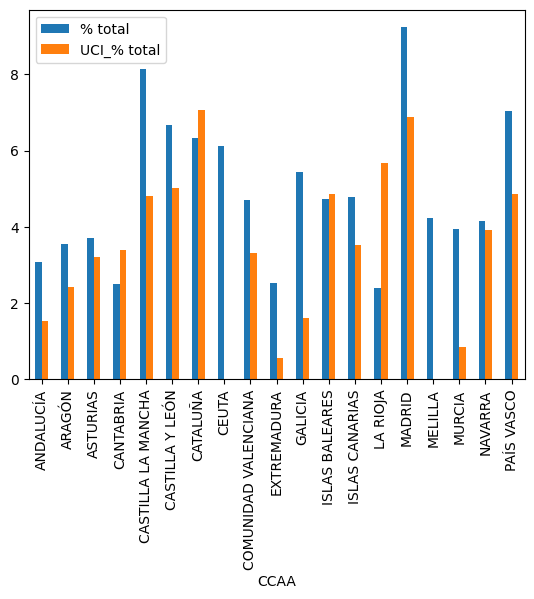

In [12]:
r.plot(kind='bar', x='CCAA',y = ['% total','UCI_% total'] )


## Módulo 2: Visualización

In [13]:
r

CCAA  TOTAL_CAMAS  OCUPADAS_COVID  % total  UCI_CD  \
0              ANDALUCÍA        15821             489     3.09    1748   
1                 ARAGÓN         3959             141     3.56     206   
2               ASTURIAS         3123             116     3.71     280   
3              CANTABRIA         1354              34     2.51     118   
4     CASTILLA LA MANCHA         4553             371     8.15     354   
5        CASTILLA Y LEÓN         6293             419     6.66     418   
6               CATALUÑA        23533            1492     6.34    1176   
7                  CEUTA          180              11     6.11      17   
8   COMUNIDAD VALENCIANA        10394             490     4.71     754   
9            EXTREMADURA         2852              72     2.52     182   
10               GALICIA         7645             415     5.43     745   
11        ISLAS BALEARES         3158             149     4.72     330   
12        ISLAS CANARIAS         5112             244     4.77     483   
13              LA RIOJA          670              16     2.39      53   
14                MADRID        15724            1452     9.23    1075   
15               MELILLA          165               7     4.24      17   
16                MURCIA         3646             144     3.95     463   
17               NAVARRA         1585              66     4.16     102   
18            PAÍS VASCO         4548             320     7.04     371   

    UCI_OCUPADAS_COVID  UCI_% total  
0                   27         1.54  
1                    5         2.43  
2                    9         3.21  
3                    4         3.39  
4                   17         4.80  
5                   21         5.02  
6                   83         7.06  
7                    0         0.00  
8                   25         3.32  
9                    1         0.55  
10                  12         1.61  
11                  16         4.85  
12                  17         3.52  
13                   3         5.66  
14                  74         6.88  
15                   0         0.00  
16                   4         0.86  
17                   4         3.92  
18                  18         4.85

### '% total' con 'UCI:% total'

In [ ]:
#Creación de una serie con Numpy y declaración del ancho
ca = np.arange(19)
ancho=0.30

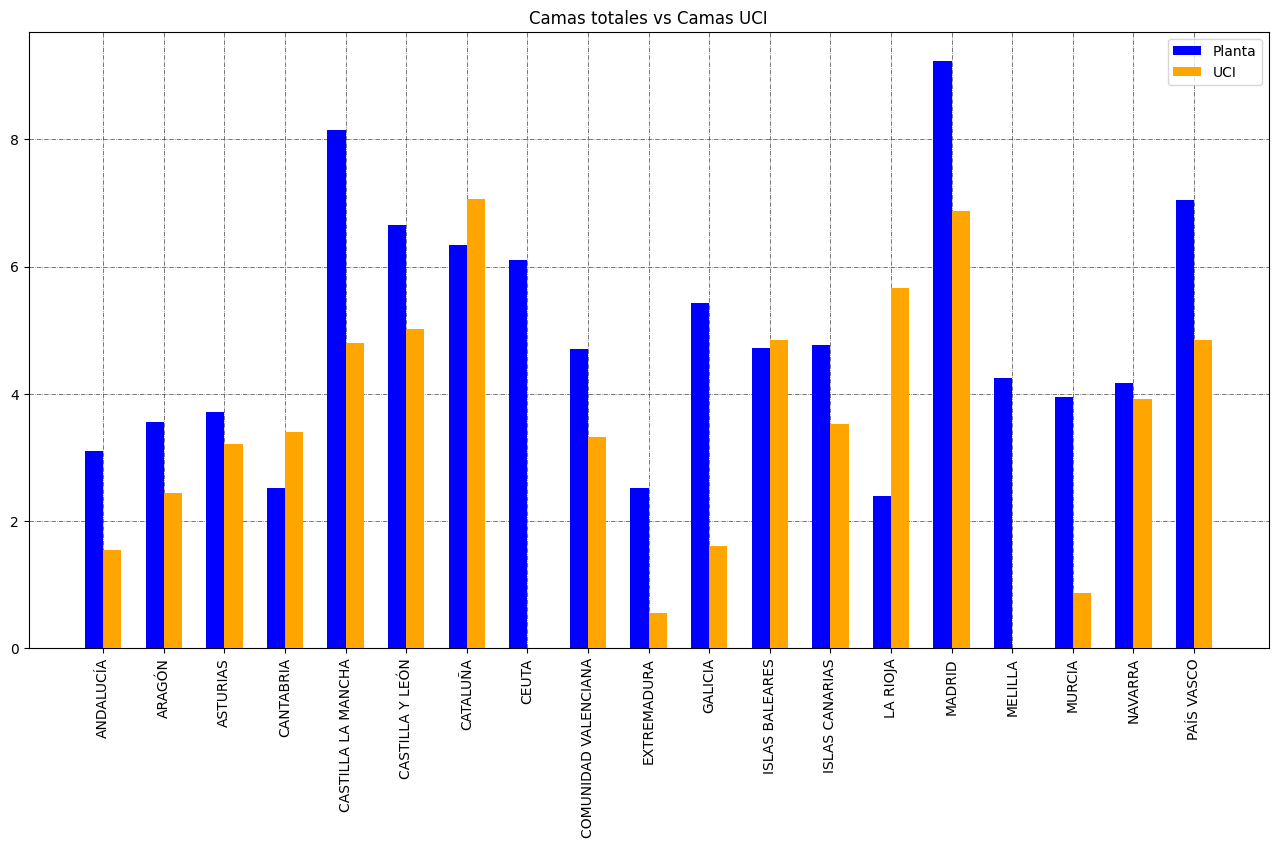

In [ ]:
# Gráfico de barras agrupadas
fig = plt.subplots(figsize=(16,8))

plt.title('Camas totales vs Camas UCI')
plt.grid(linestyle="-.", linewidth=0.5, color='.25', zorder=-10)
plt.xticks(ca+ancho, r['CCAA'], rotation = 90)


plt.bar(ca, r['% total'], width=ancho, color='b', align='edge', zorder=10, label='Planta')
plt.bar(ca+ancho, r['UCI_% total'], width=ancho, color='orange', align='edge', zorder=10, label='UCI')


plt.legend()
plt.show()

### Se realizó un script que dibuja una gráfica de barras agrupadas donde se muestra la ocupación mensual media durante el año 2021, de camas en UCI diferenciando entre camas con y sin respirador ocupadas por enfermos COVID, respecto al total, para cada CCAA. 

In [16]:
df.head()

Fecha                        Unidad  COD_CCAA             CCAA  \
0 2020-08-01    U. Críticas CON respirador         7  CASTILLA Y LEÓN   
1 2020-08-01    U. Críticas CON respirador        19          MELILLA   
2 2020-08-01  Hospitalización convencional         4   ISLAS BALEARES   
3 2020-08-01  Hospitalización convencional        17         LA RIOJA   
4 2020-08-01  Hospitalización convencional        19          MELILLA   

   Cod_Provincia       Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  \
0             34        Palencia           16                 0   
1             52         Melilla            8                 0   
2              7  Balears, Illes         2597                60   
3             26       Rioja, La          674                 1   
4             52         Melilla          165                 0   

   OCUPADAS_NO_COVID19  INGRESOS_COVID19  ALTAS_24h_COVID19  
0                   11                 0                  0  
1                    2                 0                  0  
2                 1761                10                  3  
3                  384                 1                  1  
4                   67                 0                  0

In [17]:
df.shape

(106560, 11)

In [18]:
df['Unidad'].value_counts()

Unidad
U. Críticas CON respirador      35520
Hospitalización convencional    35520
U. Críticas SIN respirador      35520
Name: count, dtype: int64

In [19]:
df_2021 = pd.DataFrame()
df_2021 = df[(df['Fecha'] >= '2021-01-01') & (df['Fecha'] <= '2021-12-31')].reset_index(drop=True)
df_2021.head()

Fecha                        Unidad  COD_CCAA         CCAA  \
0 2021-01-01  Hospitalización convencional        11  EXTREMADURA   
1 2021-01-01    U. Críticas CON respirador         9     CATALUÑA   
2 2021-01-01    U. Críticas SIN respirador         1    ANDALUCÍA   
3 2021-01-01    U. Críticas SIN respirador         1    ANDALUCÍA   
4 2021-01-01  Hospitalización convencional         3     ASTURIAS   

   Cod_Provincia  Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  \
0             10    Cáceres         1009               113   
1             43  Tarragona          103                33   
2             18    Granada           19                 0   
3             29     Málaga          116                 2   
4             33   Asturias         3136               171   

   OCUPADAS_NO_COVID19  INGRESOS_COVID19  ALTAS_24h_COVID19  
0                  376                 2                  0  
1                   28                 4                  1  
2                    5                 0                  0  
3                    3                 0                  1  
4                 1505                 9                 11

In [20]:
df_2021_meses = pd.DataFrame()
df_2021_meses = df_2021.copy()
df_2021_meses['Fecha'] = df_2021_meses['Fecha'].dt.month
df_2021_meses.head()

Fecha                        Unidad  COD_CCAA         CCAA  Cod_Provincia  \
0      1  Hospitalización convencional        11  EXTREMADURA             10   
1      1    U. Críticas CON respirador         9     CATALUÑA             43   
2      1    U. Críticas SIN respirador         1    ANDALUCÍA             18   
3      1    U. Críticas SIN respirador         1    ANDALUCÍA             29   
4      1  Hospitalización convencional         3     ASTURIAS             33   

   Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  OCUPADAS_NO_COVID19  \
0    Cáceres         1009               113                  376   
1  Tarragona          103                33                   28   
2    Granada           19                 0                    5   
3     Málaga          116                 2                    3   
4   Asturias         3136               171                 1505   

   INGRESOS_COVID19  ALTAS_24h_COVID19  
0                 2                  0  
1                 4                  1  
2                 0                  0  
3                 0                  1  
4                 9                 11

In [21]:
df_2021_meses['Unidad'].value_counts()

Unidad
Hospitalización convencional    18967
U. Críticas CON respirador      18967
U. Críticas SIN respirador      18967
Name: count, dtype: int64

In [22]:
r1 = pd.DataFrame()
# CAMAS UCI CON RESPIRADOR
r1 = df_2021_meses[df_2021_meses['Unidad']=='U. Críticas CON respirador'].groupby(['Fecha', 'CCAA'])['TOTAL_CAMAS'].mean().reset_index()
r1.rename(columns={'TOTAL_CAMAS':'TOTAL_UCI_R'}, inplace=True)
#OTRA MANERA UBIERA SIDO: r1.columns.values[1] = 'TOTAL_UCI_R'

r1['COVID_UCI_R'] = (df_2021_meses[df_2021_meses['Unidad']=='U. Críticas CON respirador'].groupby(['Fecha', 'CCAA'])['OCUPADAS_COVID19'].mean().reset_index())['OCUPADAS_COVID19']

r1['OCU_R%'] = round((r1['COVID_UCI_R']/r1['TOTAL_UCI_R'])*100,2)
#CAMAS UCI SIN RESPIRADOR

r1['TOTAL_UCI_SR'] = (df_2021_meses[df_2021_meses['Unidad']=='U. Críticas SIN respirador'].groupby(['Fecha', 'CCAA'])['TOTAL_CAMAS'].mean().reset_index())['TOTAL_CAMAS']

r1['COVID_UCI_SR'] = (df_2021_meses[df_2021_meses['Unidad']=='U. Críticas SIN respirador'].groupby(['Fecha', 'CCAA'])['OCUPADAS_COVID19'].mean().reset_index())['OCUPADAS_COVID19']

r1['OCU_SR%'] = round((r1['COVID_UCI_SR']/r1['TOTAL_UCI_SR'])*100,2)

r1

Fecha                CCAA  TOTAL_UCI_R  COVID_UCI_R  OCU_R%  \
0        1           ANDALUCÍA   159.834677    49.387097   30.90   
1        1              ARAGÓN    71.860215    21.086022   29.34   
2        1            ASTURIAS   272.548387    66.451613   24.38   
3        1           CANTABRIA   100.774194    27.483871   27.27   
4        1  CASTILLA LA MANCHA    69.090323    30.800000   44.58   
..     ...                 ...          ...          ...     ...   
223     12              MADRID   991.580645   156.741935   15.81   
224     12             MELILLA    15.000000     3.032258   20.22   
225     12              MURCIA   244.387097    34.741935   14.22   
226     12             NAVARRA   102.387097    21.612903   21.11   
227     12          PAÍS VASCO   136.440860    29.838710   21.87   

     TOTAL_UCI_SR  COVID_UCI_SR  OCU_SR%  
0       58.516129      1.423387     2.43  
1        6.204301      0.032258     0.52  
2       49.677419      0.000000     0.00  
3       22.000000      0.129032     0.59  
4       16.419355      4.529032    27.58  
..            ...           ...      ...  
223    132.258065      1.129032     0.85  
224      2.000000      0.000000     0.00  
225    163.870968     11.451613     6.99  
226     11.225806      0.000000     0.00  
227      5.978495      0.021505     0.36  

[228 rows x 8 columns]

In [23]:
r1[r1['CCAA']=='ANDALUCÍA']


Fecha       CCAA  TOTAL_UCI_R  COVID_UCI_R  OCU_R%  TOTAL_UCI_SR  \
0        1  ANDALUCÍA   159.834677    49.387097   30.90     58.516129   
19       2  ANDALUCÍA   182.781250    75.383929   41.24     58.022321   
38       3  ANDALUCÍA   176.157258    35.221774   19.99     57.383065   
57       4  ANDALUCÍA   178.662500    37.441667   20.96     57.262500   
76       5  ANDALUCÍA   179.290323    33.709677   18.80     57.266129   
95       6  ANDALUCÍA   176.683333    18.008333   10.19     57.008333   
114      7  ANDALUCÍA   176.314516    18.133065   10.28     57.205645   
133      8  ANDALUCÍA   176.770161    28.165323   15.93     55.979839   
152      9  ANDALUCÍA   176.933333    16.787500    9.49     56.245833   
171     10  ANDALUCÍA   175.572581     7.032258    4.01     55.358871   
190     11  ANDALUCÍA   175.537500     5.112500    2.91     55.075000   
209     12  ANDALUCÍA   171.193548    13.705645    8.01     54.229839   

     COVID_UCI_SR  OCU_SR%  
0        1.423387     2.43  
19       2.191964     3.78  
38       0.915323     1.60  
57       0.725000     1.27  
76       0.592742     1.04  
95       0.729167     1.28  
114      1.068548     1.87  
133      1.254032     2.24  
152      0.620833     1.10  
171      0.169355     0.31  
190      0.316667     0.57  
209      1.116935     2.06

#### GRAFICAMOS

In [24]:
len(r1['CCAA'].value_counts())

19

In [25]:
lista = r1['CCAA'].unique()
lista

array(['ANDALUCÍA', 'ARAGÓN', 'ASTURIAS', 'CANTABRIA',
       'CASTILLA LA MANCHA', 'CASTILLA Y LEÓN', 'CATALUÑA', 'CEUTA',
       'COMUNIDAD VALENCIANA', 'EXTREMADURA', 'GALICIA', 'ISLAS BALEARES',
       'ISLAS CANARIAS', 'LA RIOJA', 'MADRID', 'MELILLA', 'MURCIA',
       'NAVARRA', 'PAÍS VASCO'], dtype=object)

In [26]:
def graficarAgrupados(a,b, lugar):
    r1_1=pd.DataFrame()
    r1_1 = r1[r1['CCAA']==lugar]
    
    ax[a,b].set_title(lugar + " COVID 2021", fontsize=16, verticalalignment='bottom')
    ax[a,b].set_ylabel(lugar)
    ax[a,b].set_xlabel('Meses')
    ax[a,b].grid(linestyle="-.", linewidth=0.5, color='.25', zorder = -10)

    #AJUSTE DE POSICIÓN Y CON LABEL EL NOMBRE
    ax[a,b].set_xticks(indice + ancho)
    ax[a,b].set_xticklabels(mes, rotation=90)
    
    ax[a,b].bar(indice, r1_1['OCU_R%'], width=ancho, label="CR", align='edge', color='b')
    ax[a,b].bar(indice+ancho, r1_1['OCU_SR%'], width=ancho, label="SR", align='edge', color='orange')
    ax[a,b].legend()

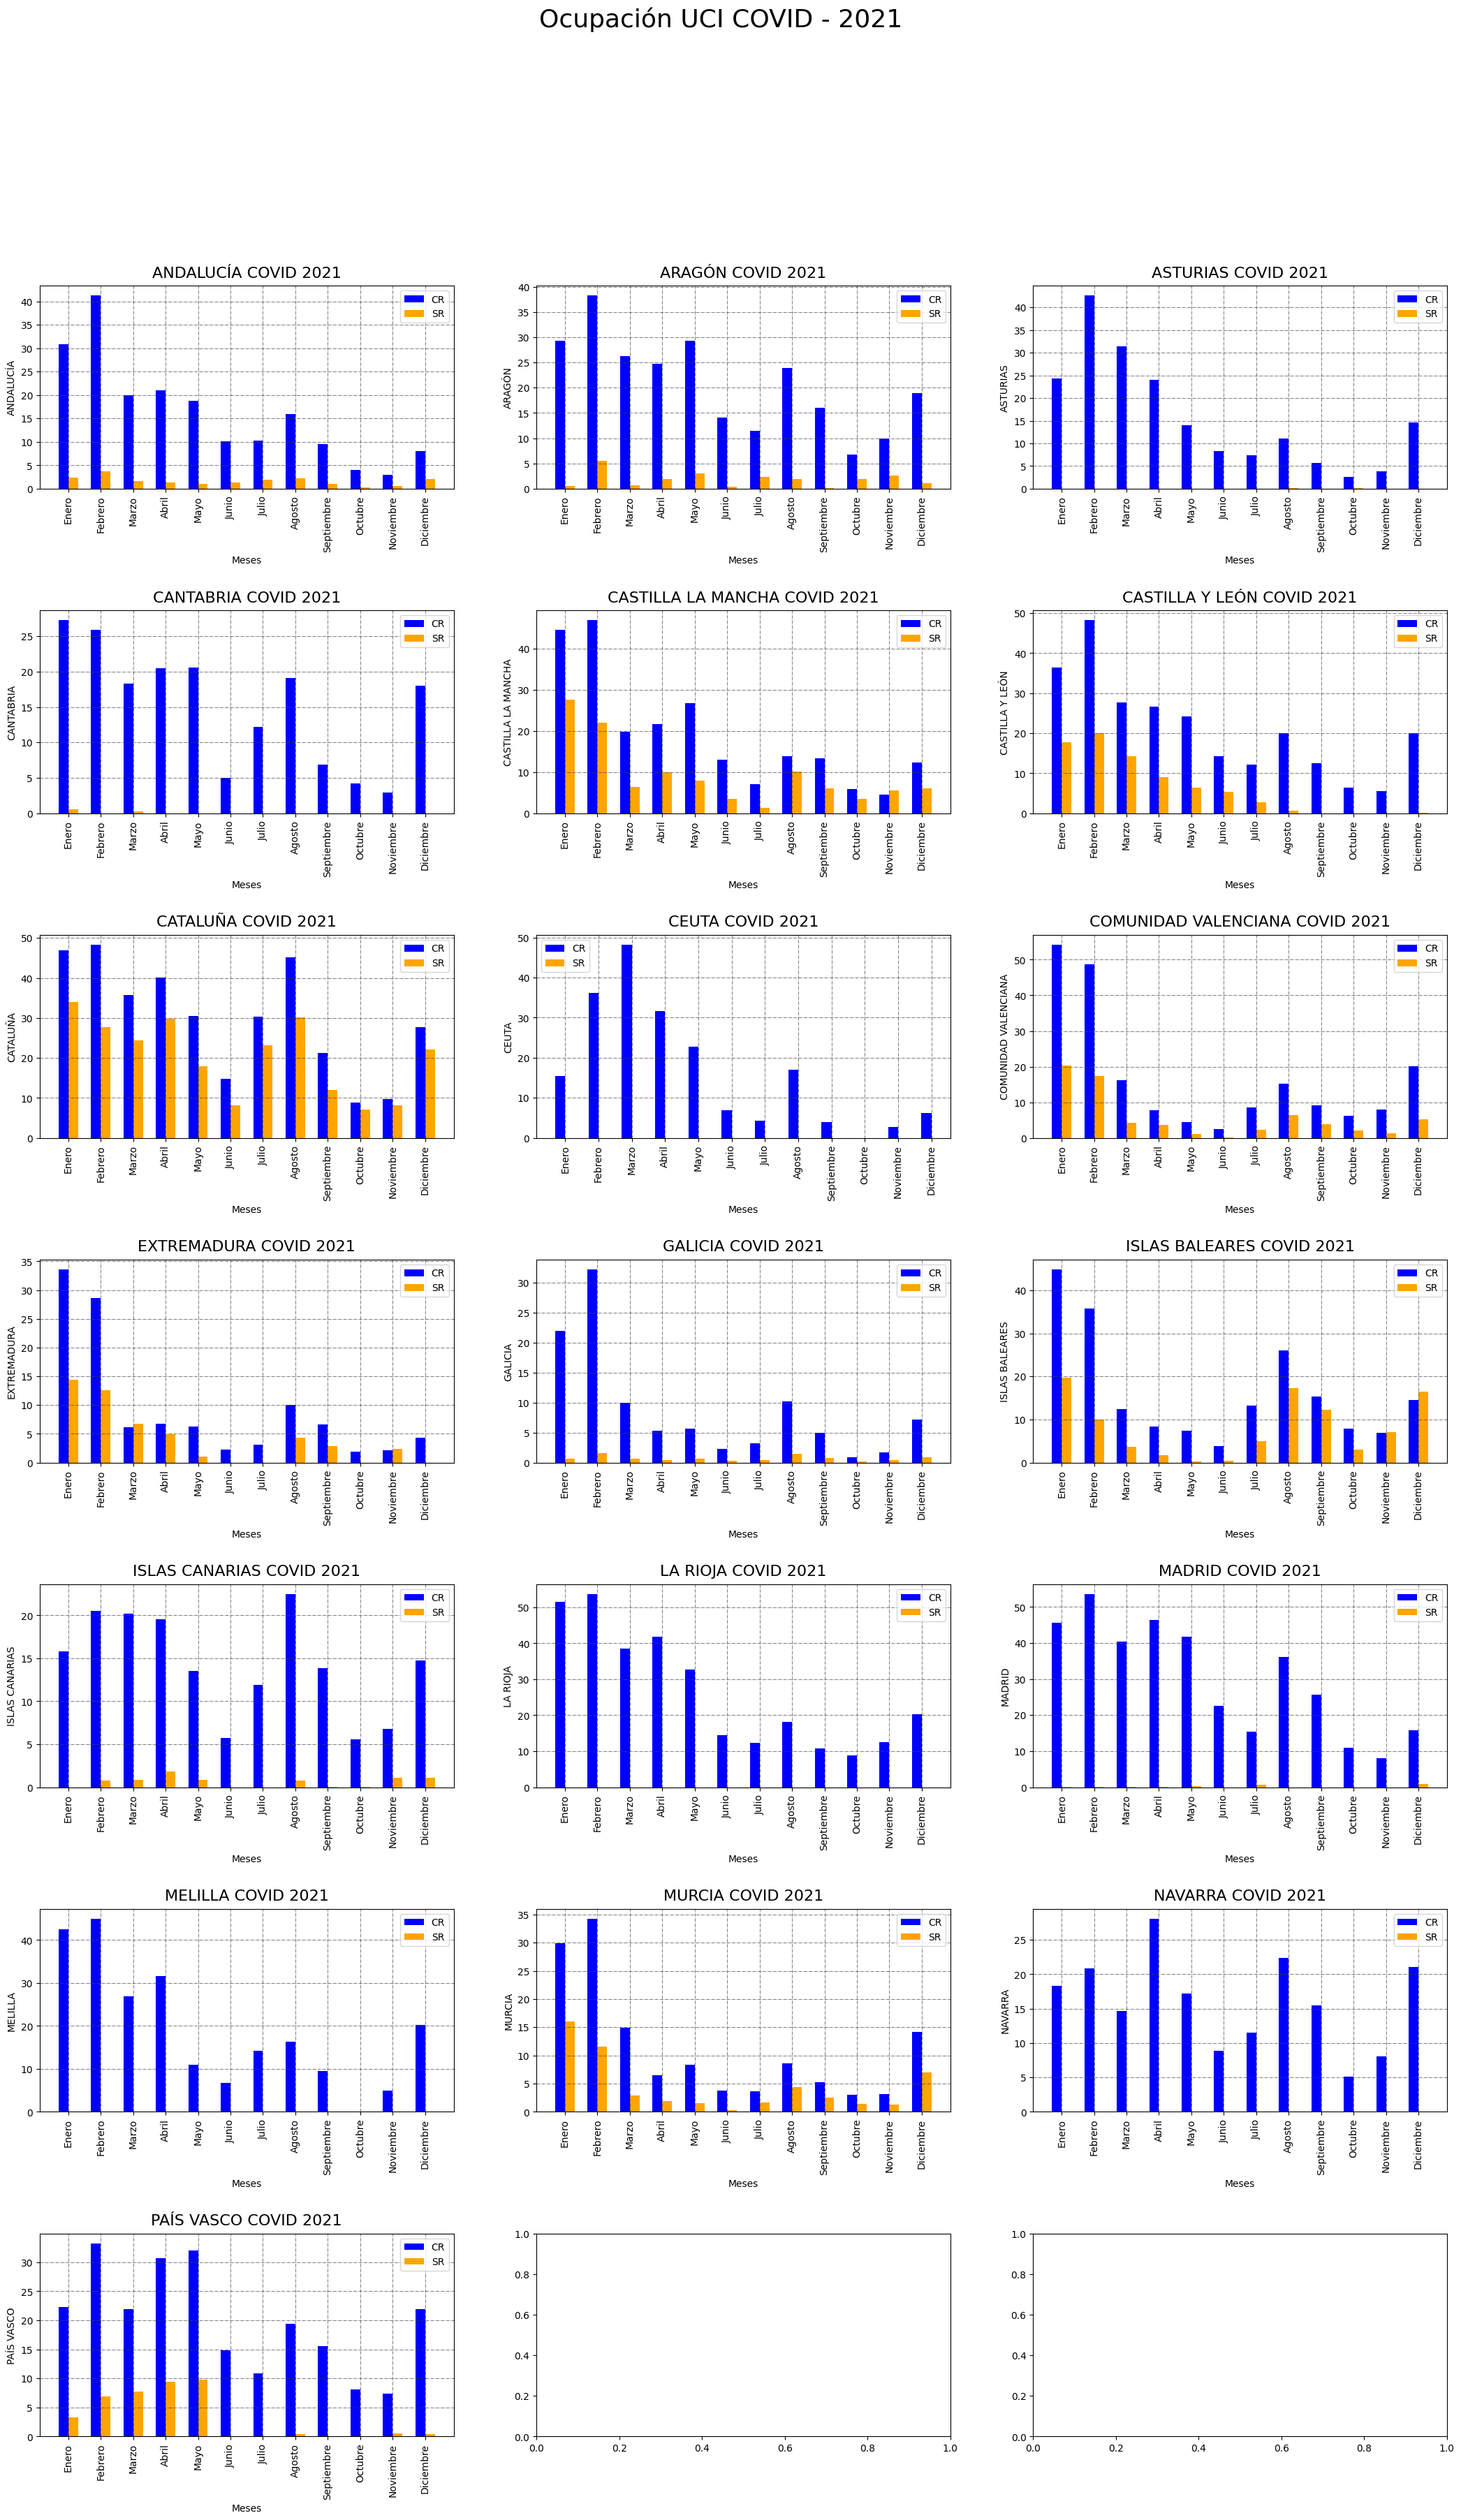

In [27]:
lista = r1['CCAA'].unique()

indice = np.arange(12)
ancho = 0.30

#meses = pd.DataFrame()
mes = pd.Series(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre','Diciembre'])

fig, ax = plt.subplots(7,3, figsize=(26,40))
plt.suptitle("Ocupación UCI COVID - 2021", fontsize=26)



for idx, comunidad in enumerate(lista):
    a = idx // 3  # Determina la fila
    b = idx % 3   # Determina la columna
    
    if a < 7:  # Asegúrate de no exceder las filas disponibles
        graficarAgrupados(a, b, comunidad)


plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

### Se desarrolló un script que dibuja una gráfica de barras apiladas donde se muestra la ocupación media de camas en planta y en UCI, respecto al total para todas las CCAA, para un mes determinado (editable).

In [28]:
df_2021_meses.head()

Fecha                        Unidad  COD_CCAA         CCAA  Cod_Provincia  \
0      1  Hospitalización convencional        11  EXTREMADURA             10   
1      1    U. Críticas CON respirador         9     CATALUÑA             43   
2      1    U. Críticas SIN respirador         1    ANDALUCÍA             18   
3      1    U. Críticas SIN respirador         1    ANDALUCÍA             29   
4      1  Hospitalización convencional         3     ASTURIAS             33   

   Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  OCUPADAS_NO_COVID19  \
0    Cáceres         1009               113                  376   
1  Tarragona          103                33                   28   
2    Granada           19                 0                    5   
3     Málaga          116                 2                    3   
4   Asturias         3136               171                 1505   

   INGRESOS_COVID19  ALTAS_24h_COVID19  
0                 2                  0  
1                 4                  1  
2                 0                  0  
3                 0                  1  
4                 9                 11

In [29]:
df_2021_meses['CAMAS_OCUPADAS']=df_2021_meses['OCUPADAS_COVID19'] + df_2021_meses['OCUPADAS_NO_COVID19']

ot=pd.DataFrame()
ot = df_2021_meses[(df_2021_meses['Unidad']=='Hospitalización convencional')].groupby(['Fecha','CCAA'])['TOTAL_CAMAS'].mean().reset_index()
ot['CAMAS_OCUPADAS'] = (df_2021_meses[df_2021_meses['Unidad']=='Hospitalización convencional'].
                        groupby(['Fecha','CCAA'])['OCUPADAS_COVID19'].mean().reset_index())['OCUPADAS_COVID19']
ot['Porcentaje']=round(((ot['CAMAS_OCUPADAS']/ot['TOTAL_CAMAS'])*100), 2)

ot['TOTAL_CAMAS_UCI'] = (df_2021_meses[(df_2021_meses['Unidad']=='U. Críticas CON respirador') | (df_2021_meses['Unidad']=='U. Críticas SIN respirador')].
                        groupby(['Fecha','CCAA'])['TOTAL_CAMAS'].mean().reset_index())['TOTAL_CAMAS']
ot['CAMAS_OCUPADAS_UCI'] = (df_2021_meses[(df_2021_meses['Unidad']=='U. Críticas CON respirador') | (df_2021_meses['Unidad']=='U. Críticas SIN respirador')].
                        groupby(['Fecha','CCAA'])['OCUPADAS_COVID19'].mean().reset_index())['OCUPADAS_COVID19']
ot['Porcentaje_UCI']=round(((ot['CAMAS_OCUPADAS_UCI']/ot['TOTAL_CAMAS_UCI'])*100), 2)

ot.head()


Fecha                CCAA  TOTAL_CAMAS  CAMAS_OCUPADAS  Porcentaje  \
0      1           ANDALUCÍA  1958.947581      287.548387       14.68   
1      1              ARAGÓN  1344.182796      170.387097       12.68   
2      1            ASTURIAS  3161.064516      305.967742        9.68   
3      1           CANTABRIA  1488.000000      143.032258        9.61   
4      1  CASTILLA LA MANCHA   944.103226      227.258065       24.07   

   TOTAL_CAMAS_UCI  CAMAS_OCUPADAS_UCI  Porcentaje_UCI  
0       109.175403           25.405242           23.27  
1        39.032258           10.559140           27.05  
2       161.112903           33.225806           20.62  
3        61.387097           13.806452           22.49  
4        42.754839           17.664516           41.32

In [30]:
#suma = round(ot['TOTAL_CAMAS'].sum(),2)
#suma_UCI = round(ot['TOTAL_CAMAS_UCI'].sum(),2)


#### Graficamos

In [31]:
ot['Fecha'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [32]:
def graficarAgrupados(a,b, fecha):
    ot1=pd.DataFrame()
    ot1 = ot[ot['Fecha']==fecha]
    
    ax[a,b].set_title('%Ocupacional Mes: '+ str(fecha) + "- 2021", fontsize=16, verticalalignment='bottom')
    ax[a,b].set_ylabel('Mes: '+ str(fecha))
    ax[a,b].set_xlabel('CCAA')
    ax[a,b].grid(axis='y', linestyle="-.", linewidth=0.5, color='.25', zorder = -10)

    #AJUSTE DE POSICIÓN Y CON LABEL EL NOMBRE
    #set_xticks solo recibe parametros numeros, para texto usar xtickslabels. 1RO MANDAMOS UBICACION, LUEGO NOMBRES
    ax[a,b].set_xticks(departamentos)
    ax[a,b].set_xticklabels(ot1['CCAA'],rotation=90)
    

    ax[a,b].bar(ot1['CCAA'], ot1['Porcentaje'], width=0.5, label="Planta", color='b', zorder=10)
    ax[a,b].bar(ot1['CCAA'], ot1['Porcentaje_UCI'], width=0.5, label="UCI", bottom=ot1['Porcentaje'], color='orange', zorder=10)
    ax[a,b].legend()

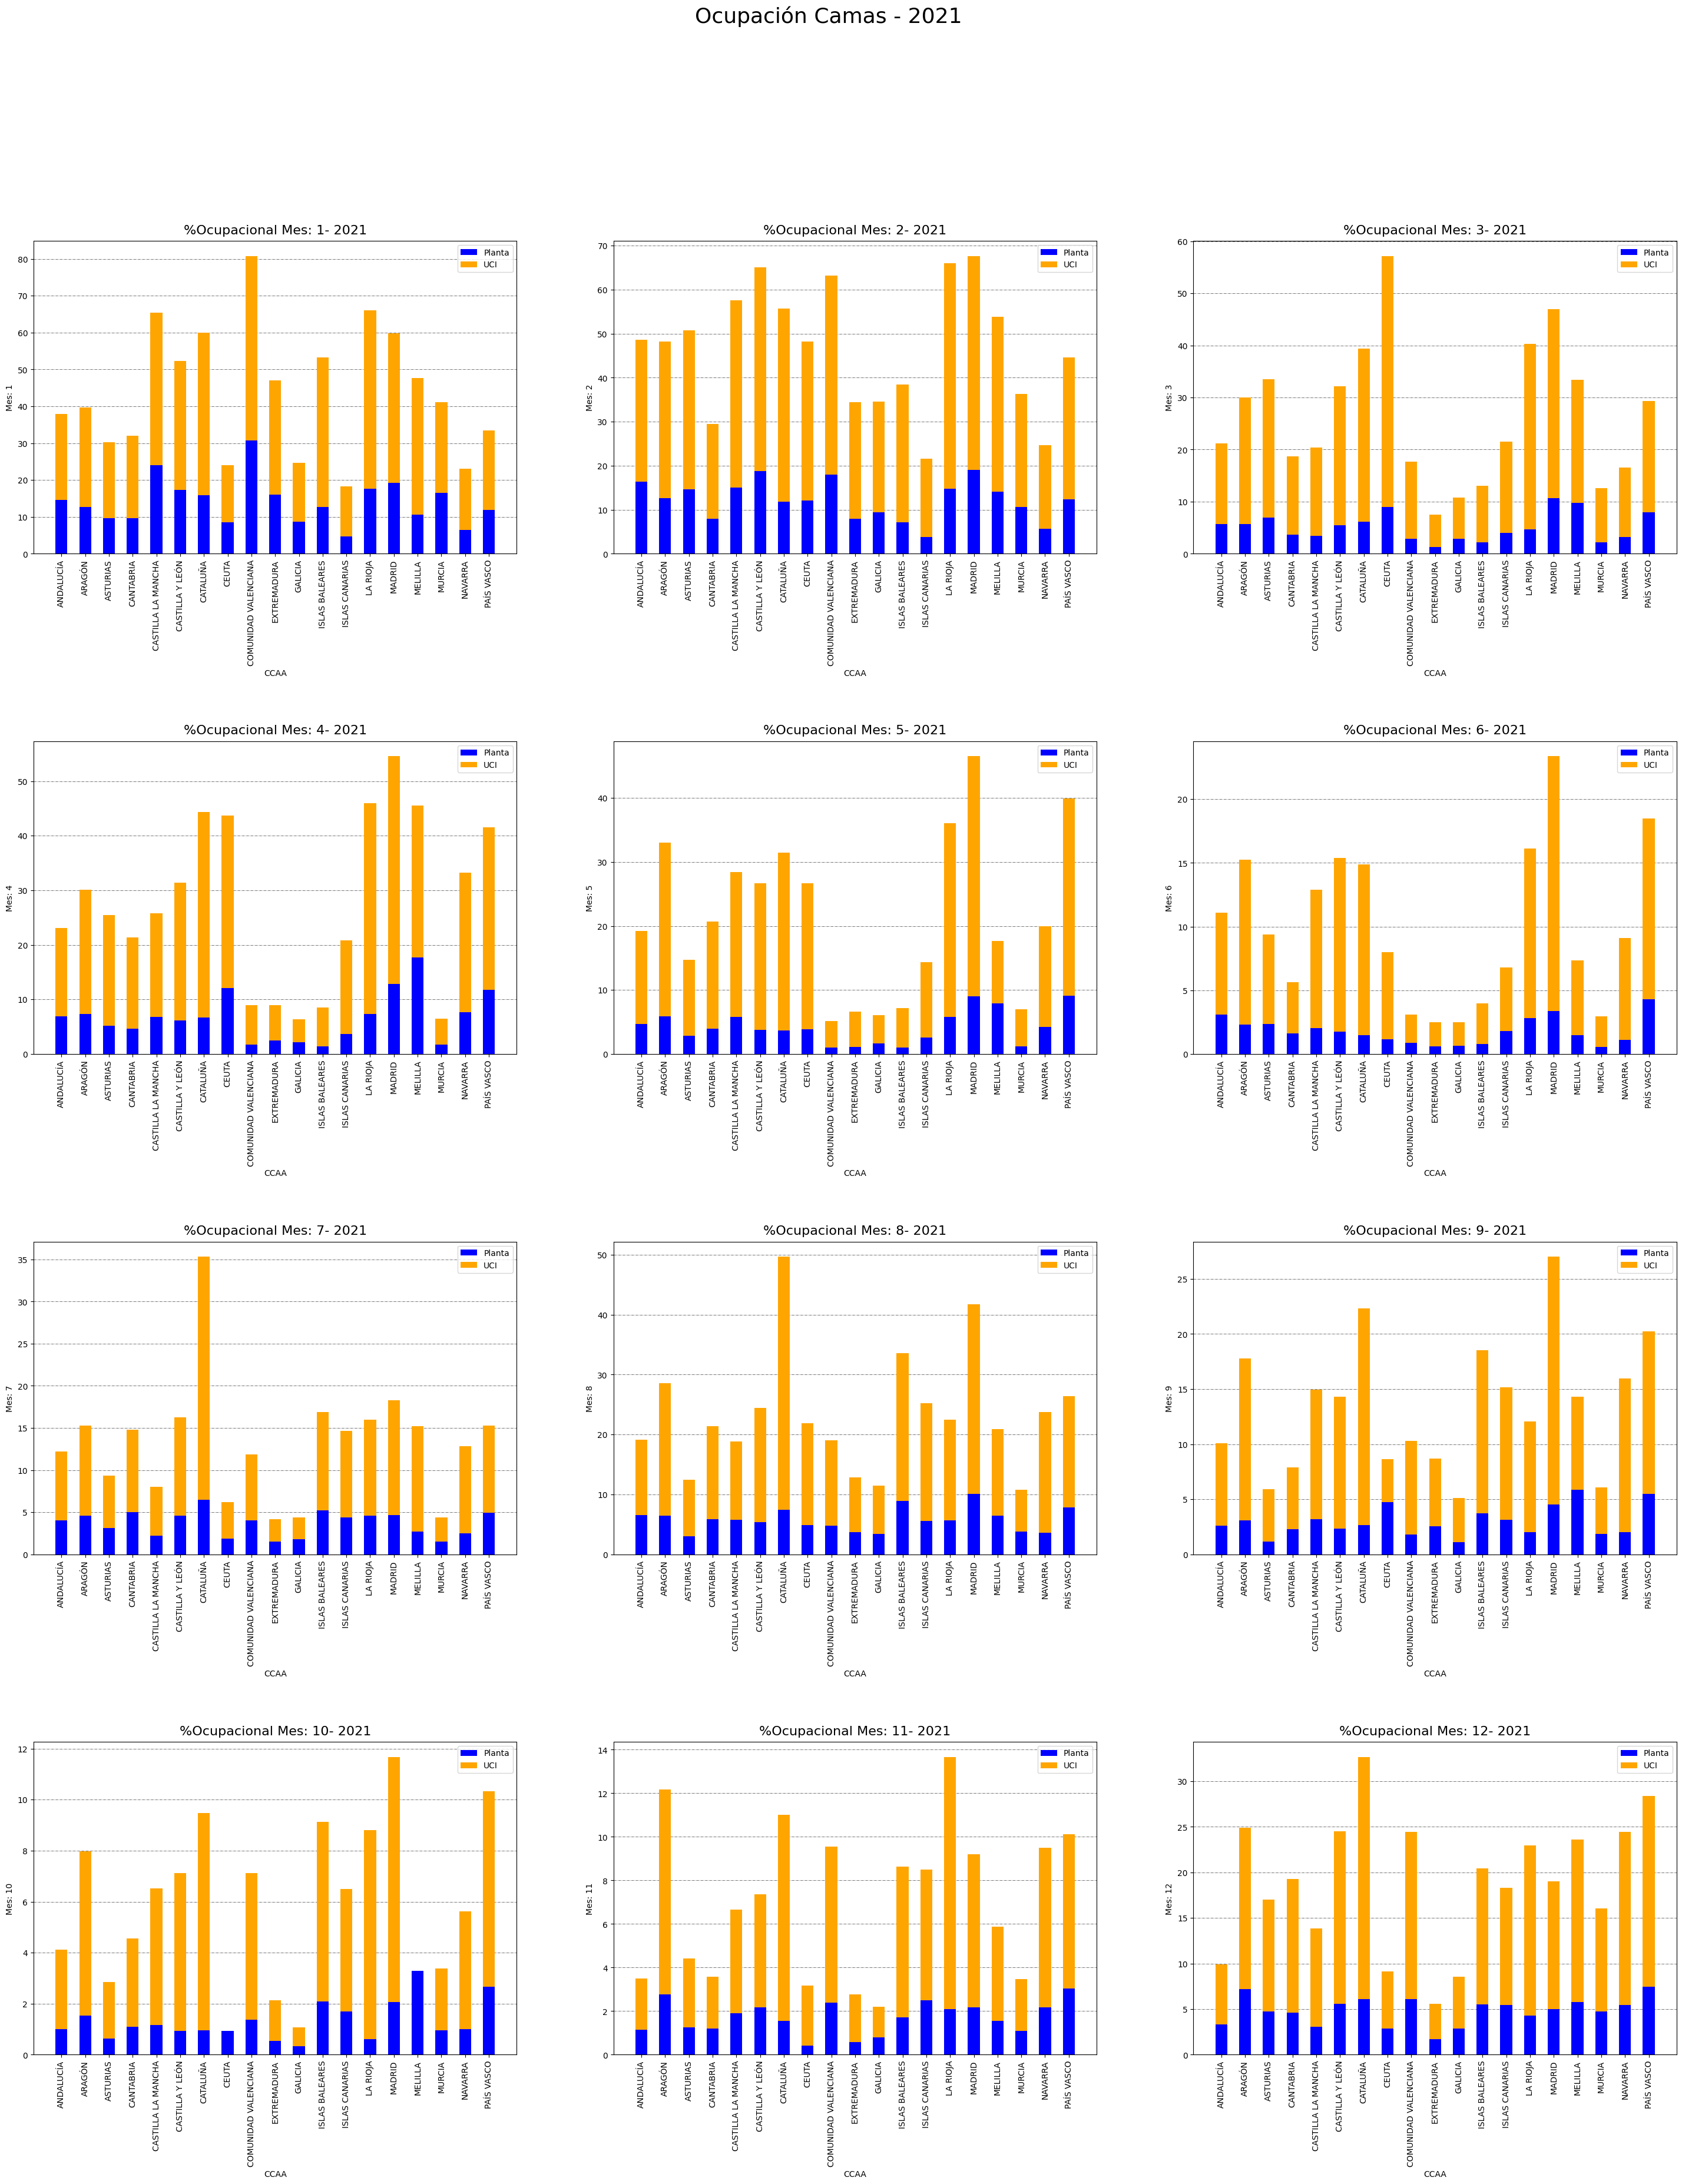

In [33]:
lista=ot['Fecha'].unique()
departamentos = np.arange(len(ot['CCAA'].unique()))
fig, ax = plt.subplots(4,3, figsize=(36,40))
plt.suptitle("Ocupación Camas - 2021", fontsize=26)

for idx, fecha in enumerate(lista):
    a = idx // 3  # Determina la fila
    b = idx % 3   # Determina la columna
    
    if a < 4:  # Asegúrate de no exceder las filas disponibles
        graficarAgrupados(a, b, fecha)


plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

### Partiendo del fichero “Datos_Capacidad_Asistencial_Historico.csv”, se realizó un script que dibuje una gráfica de líneas donde se visualiza la evolución de la ocupación diaria en 2021, de camas en Planta ocupadas por enfermos COVID, respecto al total, para cada CCAA. 

In [34]:
df_2021.head(5)

Fecha                        Unidad  COD_CCAA         CCAA  \
0 2021-01-01  Hospitalización convencional        11  EXTREMADURA   
1 2021-01-01    U. Críticas CON respirador         9     CATALUÑA   
2 2021-01-01    U. Críticas SIN respirador         1    ANDALUCÍA   
3 2021-01-01    U. Críticas SIN respirador         1    ANDALUCÍA   
4 2021-01-01  Hospitalización convencional         3     ASTURIAS   

   Cod_Provincia  Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  \
0             10    Cáceres         1009               113   
1             43  Tarragona          103                33   
2             18    Granada           19                 0   
3             29     Málaga          116                 2   
4             33   Asturias         3136               171   

   OCUPADAS_NO_COVID19  INGRESOS_COVID19  ALTAS_24h_COVID19  
0                  376                 2                  0  
1                   28                 4                  1  
2                    5                 0                  0  
3                    3                 0                  1  
4                 1505                 9                 11

In [35]:
Ocupacion_diaria = pd.DataFrame()
Ocupacion_diaria = df_2021[df_2021['Unidad']=='Hospitalización convencional'].groupby(['Fecha','CCAA'])['TOTAL_CAMAS'].sum().reset_index()

Ocupacion_diaria['CAMAS_CV19'] = (df_2021[df_2021['Unidad']=='Hospitalización convencional'].groupby(['Fecha','CCAA'])['OCUPADAS_COVID19'].sum().reset_index())['OCUPADAS_COVID19']

Ocupacion_diaria['Porcentaje'] = round(Ocupacion_diaria['CAMAS_CV19']*100/Ocupacion_diaria['TOTAL_CAMAS'], 2)

Ocupacion_diaria

Fecha                CCAA  TOTAL_CAMAS  CAMAS_CV19  Porcentaje
0    2021-01-01           ANDALUCÍA        15331         757        4.94
1    2021-01-01              ARAGÓN         3930         297        7.56
2    2021-01-01            ASTURIAS         3136         171        5.45
3    2021-01-01           CANTABRIA         1488          88        5.91
4    2021-01-01  CASTILLA LA MANCHA         4442         508       11.44
...         ...                 ...          ...         ...         ...
6929 2021-12-31              MADRID        15192        1707       11.24
6930 2021-12-31             MELILLA          165          14        8.48
6931 2021-12-31              MURCIA         3636         239        6.57
6932 2021-12-31             NAVARRA         1689         120        7.10
6933 2021-12-31          PAÍS VASCO         4336         513       11.83

[6934 rows x 5 columns]

#### Graficamos

In [36]:
Ocupacion_diaria[Ocupacion_diaria['CCAA']=='ANDALUCÍA'][['Fecha','Porcentaje']].head(-5)

Fecha  Porcentaje
0    2021-01-01        4.94
19   2021-01-02        5.03
38   2021-01-03        5.71
56   2021-01-04        6.13
75   2021-01-05        6.18
...         ...         ...
6744 2021-12-22        4.15
6763 2021-12-23        4.23
6782 2021-12-24        4.26
6801 2021-12-25        4.46
6820 2021-12-26        5.30

[360 rows x 2 columns]

In [37]:
def graficarAgrupados(a,b, lugar):
    df_1=pd.DataFrame()
    df_1 = Ocupacion_diaria[Ocupacion_diaria['CCAA']==lugar][['Fecha','Porcentaje']]
    
    ax[a,b].set_title('%Ocupacional Diario '+ lugar + "- 2021", fontsize=16)
    ax[a,b].set_ylabel('%Ocupación')
    ax[a,b].set_xlabel('Día')
    ax[a,b].grid(axis='y', linestyle="-.", linewidth=0.5, color='.25', zorder = -10)

    #AJUSTE DE POSICIÓN Y CON LABEL EL NOMBRE
    ax[a,b].plot(df_1['Fecha'], df_1['Porcentaje'], linestyle='-', label="Planta", color='b', zorder=10)
  
    ax[a,b].legend()

In [38]:
len(Ocupacion_diaria['CCAA'].unique())

19

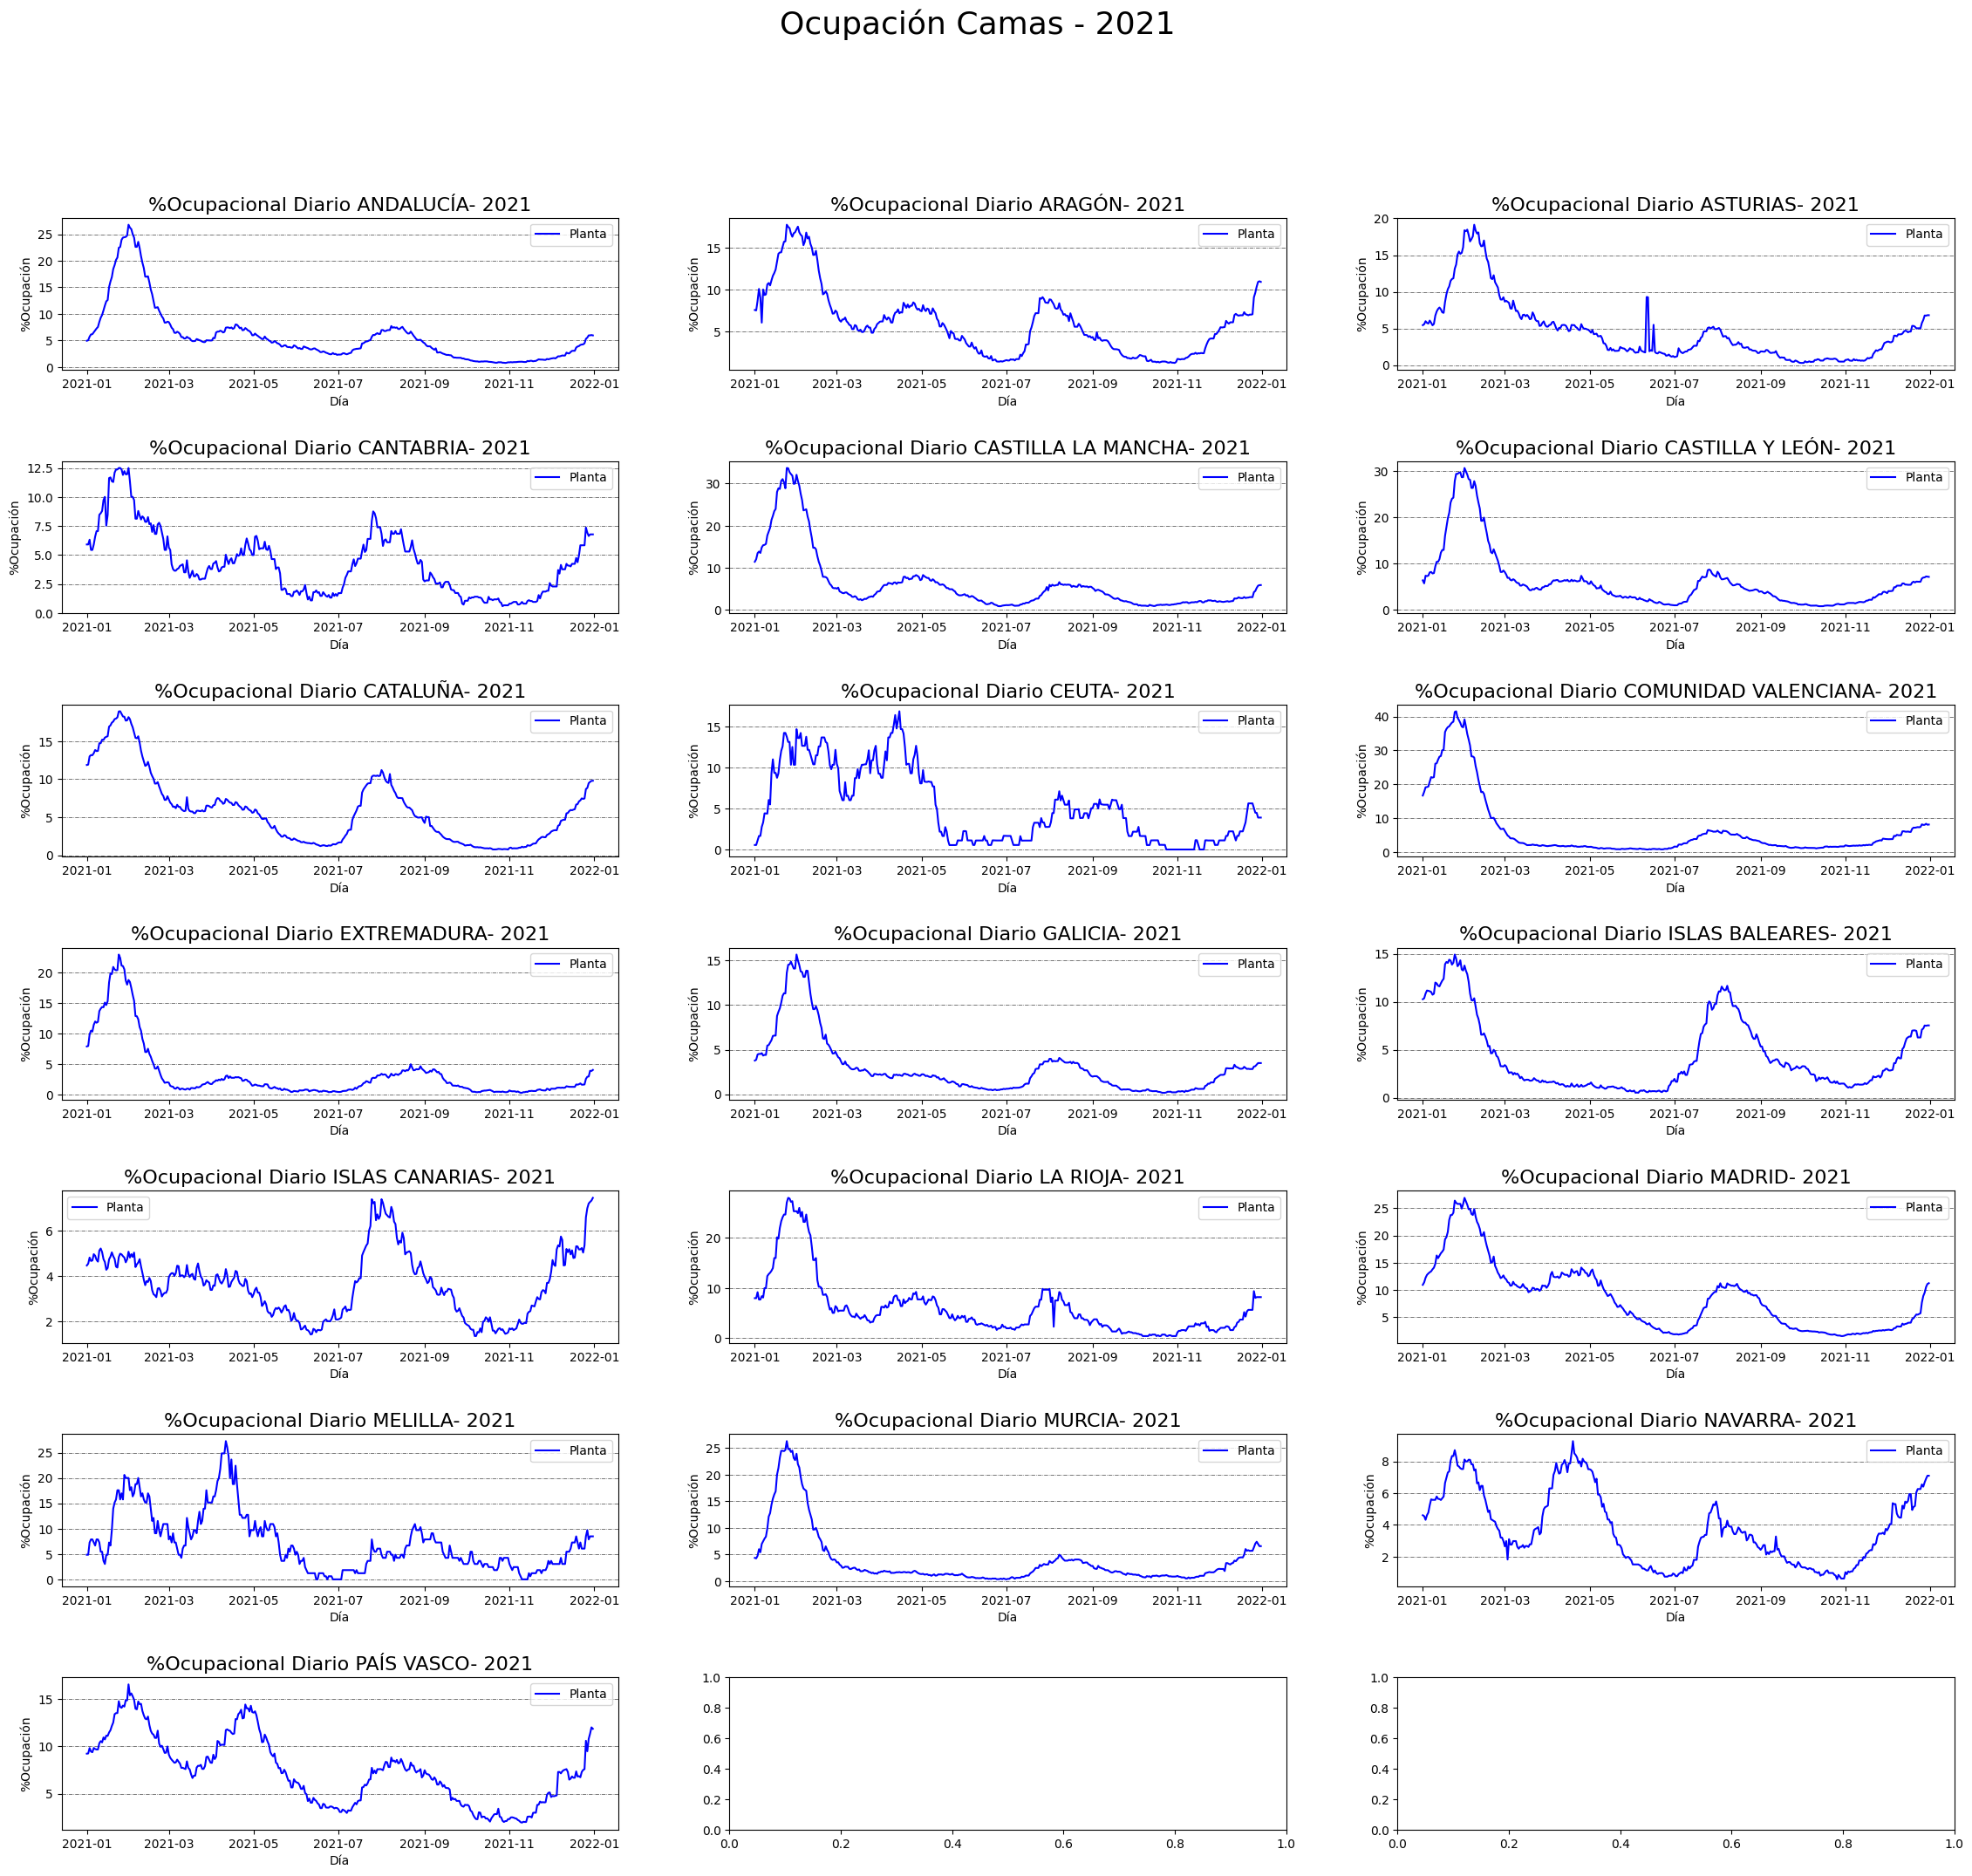

In [39]:
lista=Ocupacion_diaria['CCAA'].unique()

fig, ax = plt.subplots(7,3, figsize=(28,24))
plt.suptitle("Ocupación Camas - 2021", fontsize=26)

for idx, lugar in enumerate(lista):
    a = idx // 3  # Determina la fila
    b = idx % 3   # Determina la columna
    
    if a < 7:  # Asegúrate de no exceder las filas disponibles
        graficarAgrupados(a, b, lugar)


plt.subplots_adjust(wspace=0.2, hspace=0.6)
#plt.tight_layout()
plt.show()

### Se realizó un script que dibuje 18 gráficas de líneas donde se visualice la evolución de la ocupación diaria de un mes determinado de 2021, de camas en Planta ocupadas por enfermos COVID, respecto al total, para cada CCAA (excepto Ceuta y Melilla) y la media española en una matriz de 6x3. FORMATO AAAA-MM

In [40]:
df.head()

Fecha                        Unidad  COD_CCAA             CCAA  \
0 2020-08-01    U. Críticas CON respirador         7  CASTILLA Y LEÓN   
1 2020-08-01    U. Críticas CON respirador        19          MELILLA   
2 2020-08-01  Hospitalización convencional         4   ISLAS BALEARES   
3 2020-08-01  Hospitalización convencional        17         LA RIOJA   
4 2020-08-01  Hospitalización convencional        19          MELILLA   

   Cod_Provincia       Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  \
0             34        Palencia           16                 0   
1             52         Melilla            8                 0   
2              7  Balears, Illes         2597                60   
3             26       Rioja, La          674                 1   
4             52         Melilla          165                 0   

   OCUPADAS_NO_COVID19  INGRESOS_COVID19  ALTAS_24h_COVID19  
0                   11                 0                  0  
1                    2                 0                  0  
2                 1761                10                  3  
3                  384                 1                  1  
4                   67                 0                  0

In [41]:
df = df[~df['COD_CCAA'].isin([18,19])]
df.head()

Fecha                        Unidad  COD_CCAA             CCAA  \
0 2020-08-01    U. Críticas CON respirador         7  CASTILLA Y LEÓN   
2 2020-08-01  Hospitalización convencional         4   ISLAS BALEARES   
3 2020-08-01  Hospitalización convencional        17         LA RIOJA   
5 2020-08-01    U. Críticas CON respirador         1        ANDALUCÍA   
6 2020-08-01    U. Críticas CON respirador         1        ANDALUCÍA   

   Cod_Provincia       Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  \
0             34        Palencia           16                 0   
2              7  Balears, Illes         2597                60   
3             26       Rioja, La          674                 1   
5             23            Jaén           66                 0   
6             41         Sevilla          236                 1   

   OCUPADAS_NO_COVID19  INGRESOS_COVID19  ALTAS_24h_COVID19  
0                   11                 0                  0  
2                 1761                10                  3  
3                  384                 1                  1  
5                   19                 0                  0  
6                   95                 0                  0

In [42]:
r = pd.DataFrame()
r = df[df['Unidad']=='Hospitalización convencional'].groupby(['Fecha','CCAA'])['TOTAL_CAMAS'].sum().reset_index()
r['CAMAS_COVID'] = (df[df['Unidad']=='Hospitalización convencional'].groupby(['Fecha','CCAA'])['OCUPADAS_COVID19'].sum().reset_index())['OCUPADAS_COVID19']

r['Ocupadas%'] = round(r['CAMAS_COVID']*100/r['TOTAL_CAMAS'],2)
r

Fecha                CCAA  TOTAL_CAMAS  CAMAS_COVID  Ocupadas%
0     2020-08-01           ANDALUCÍA        14855           88       0.59
1     2020-08-01              ARAGÓN         3824          334       8.73
2     2020-08-01            ASTURIAS         3031            9       0.30
3     2020-08-01           CANTABRIA         1444           14       0.97
4     2020-08-01  CASTILLA LA MANCHA         4160           29       0.70
...          ...                 ...          ...          ...        ...
11617 2022-06-15            LA RIOJA          670           16       2.39
11618 2022-06-15              MADRID        15724         1452       9.23
11619 2022-06-15              MURCIA         3646          144       3.95
11620 2022-06-15             NAVARRA         1585           66       4.16
11621 2022-06-15          PAÍS VASCO         4548          320       7.04

[11622 rows x 5 columns]

In [43]:
r_esp = r.groupby('Fecha')['TOTAL_CAMAS'].sum().reset_index()
r_esp.columns.values[1] = 'CAMAS_ESP'
r_esp['CV_ESP']= (r.groupby('Fecha')['CAMAS_COVID'].sum().reset_index())['CAMAS_COVID']
r_esp['ESP%'] = round(r_esp['CV_ESP']*100/r_esp['CAMAS_ESP'], 2)
r_esp

Fecha  CAMAS_ESP  CV_ESP  ESP%
0   2020-08-01     106163    2083  1.96
1   2020-08-02     105591    2325  2.20
2   2020-08-03     104883    2370  2.26
3   2020-08-04     105538    2405  2.28
4   2020-08-05     105913    2513  2.37
..         ...        ...     ...   ...
679 2022-06-11     108318    5698  5.26
680 2022-06-12     109901    6221  5.66
681 2022-06-13     109616    6177  5.64
682 2022-06-14     111752    6287  5.63
683 2022-06-15     113970    6430  5.64

[684 rows x 4 columns]

In [44]:
m = 2
year = 2021
v = (r_esp[(r_esp['Fecha'].dt.month == m) & (r_esp['Fecha'].dt.year == year )][['Fecha','ESP%']])
v

Fecha   ESP%
184 2021-02-01  22.29
185 2021-02-02  21.61
186 2021-02-03  20.78
187 2021-02-04  20.19
188 2021-02-05  18.90
189 2021-02-06  18.89
190 2021-02-07  19.45
191 2021-02-08  18.37
192 2021-02-09  17.22
193 2021-02-10  16.21
194 2021-02-11  15.28
195 2021-02-12  14.07
196 2021-02-13  14.13
197 2021-02-14  14.36
198 2021-02-15  13.31
199 2021-02-16  12.32
200 2021-02-17  11.51
201 2021-02-18  10.80
202 2021-02-19   9.74
203 2021-02-20   9.74
204 2021-02-21  10.15
205 2021-02-22   9.39
206 2021-02-23   8.85
207 2021-02-24   8.34
208 2021-02-25   7.93
209 2021-02-26   7.34
210 2021-02-27   7.37
211 2021-02-28   7.65

In [45]:
def graficar(a,b, lugar,m, year):
  #Importante asignarlo a un DATAFRAME NUEVO O VARIABLE. SINO SE APLICA SOBRE EL DF ORIGINAL Y NO EL FILTRADO.
  if (a==5 and b ==2):

    v = (r_esp[(r_esp['Fecha'].dt.month == m) & (r_esp['Fecha'].dt.year == year )][['Fecha','ESP%']])

    ax[a,b].set_title( 'ESPAÑA', fontsize=16, verticalalignment='bottom')
    ax[a,b].set_ylabel('Cantidad')
    ax[a,b].set_xlabel('Dia')
    ax[a,b].grid(axis = 'y', linestyle="-.", linewidth=0.5, color='.25', zorder = -10)
    ax[a,b].plot(v['Fecha'], v['ESP%'], linestyle='-', color='b', zorder=10, marker='o')

  else: 
    v = (r[(r['Fecha'].dt.month == m) & (r['Fecha'].dt.year == year ) & (r['CCAA'] == lugar)][['Fecha','Ocupadas%']])

    ax[a,b].set_title( lugar, fontsize=16, verticalalignment='bottom')
    ax[a,b].set_ylabel('Cantidad')
    ax[a,b].set_xlabel('Dia')
    ax[a,b].grid(axis = 'y', linestyle="-.", linewidth=0.5, color='.25', zorder = -10)

    ax[a,b].plot(v['Fecha'], v['Ocupadas%'], linestyle='-', color='b', zorder=10,marker='o')

 

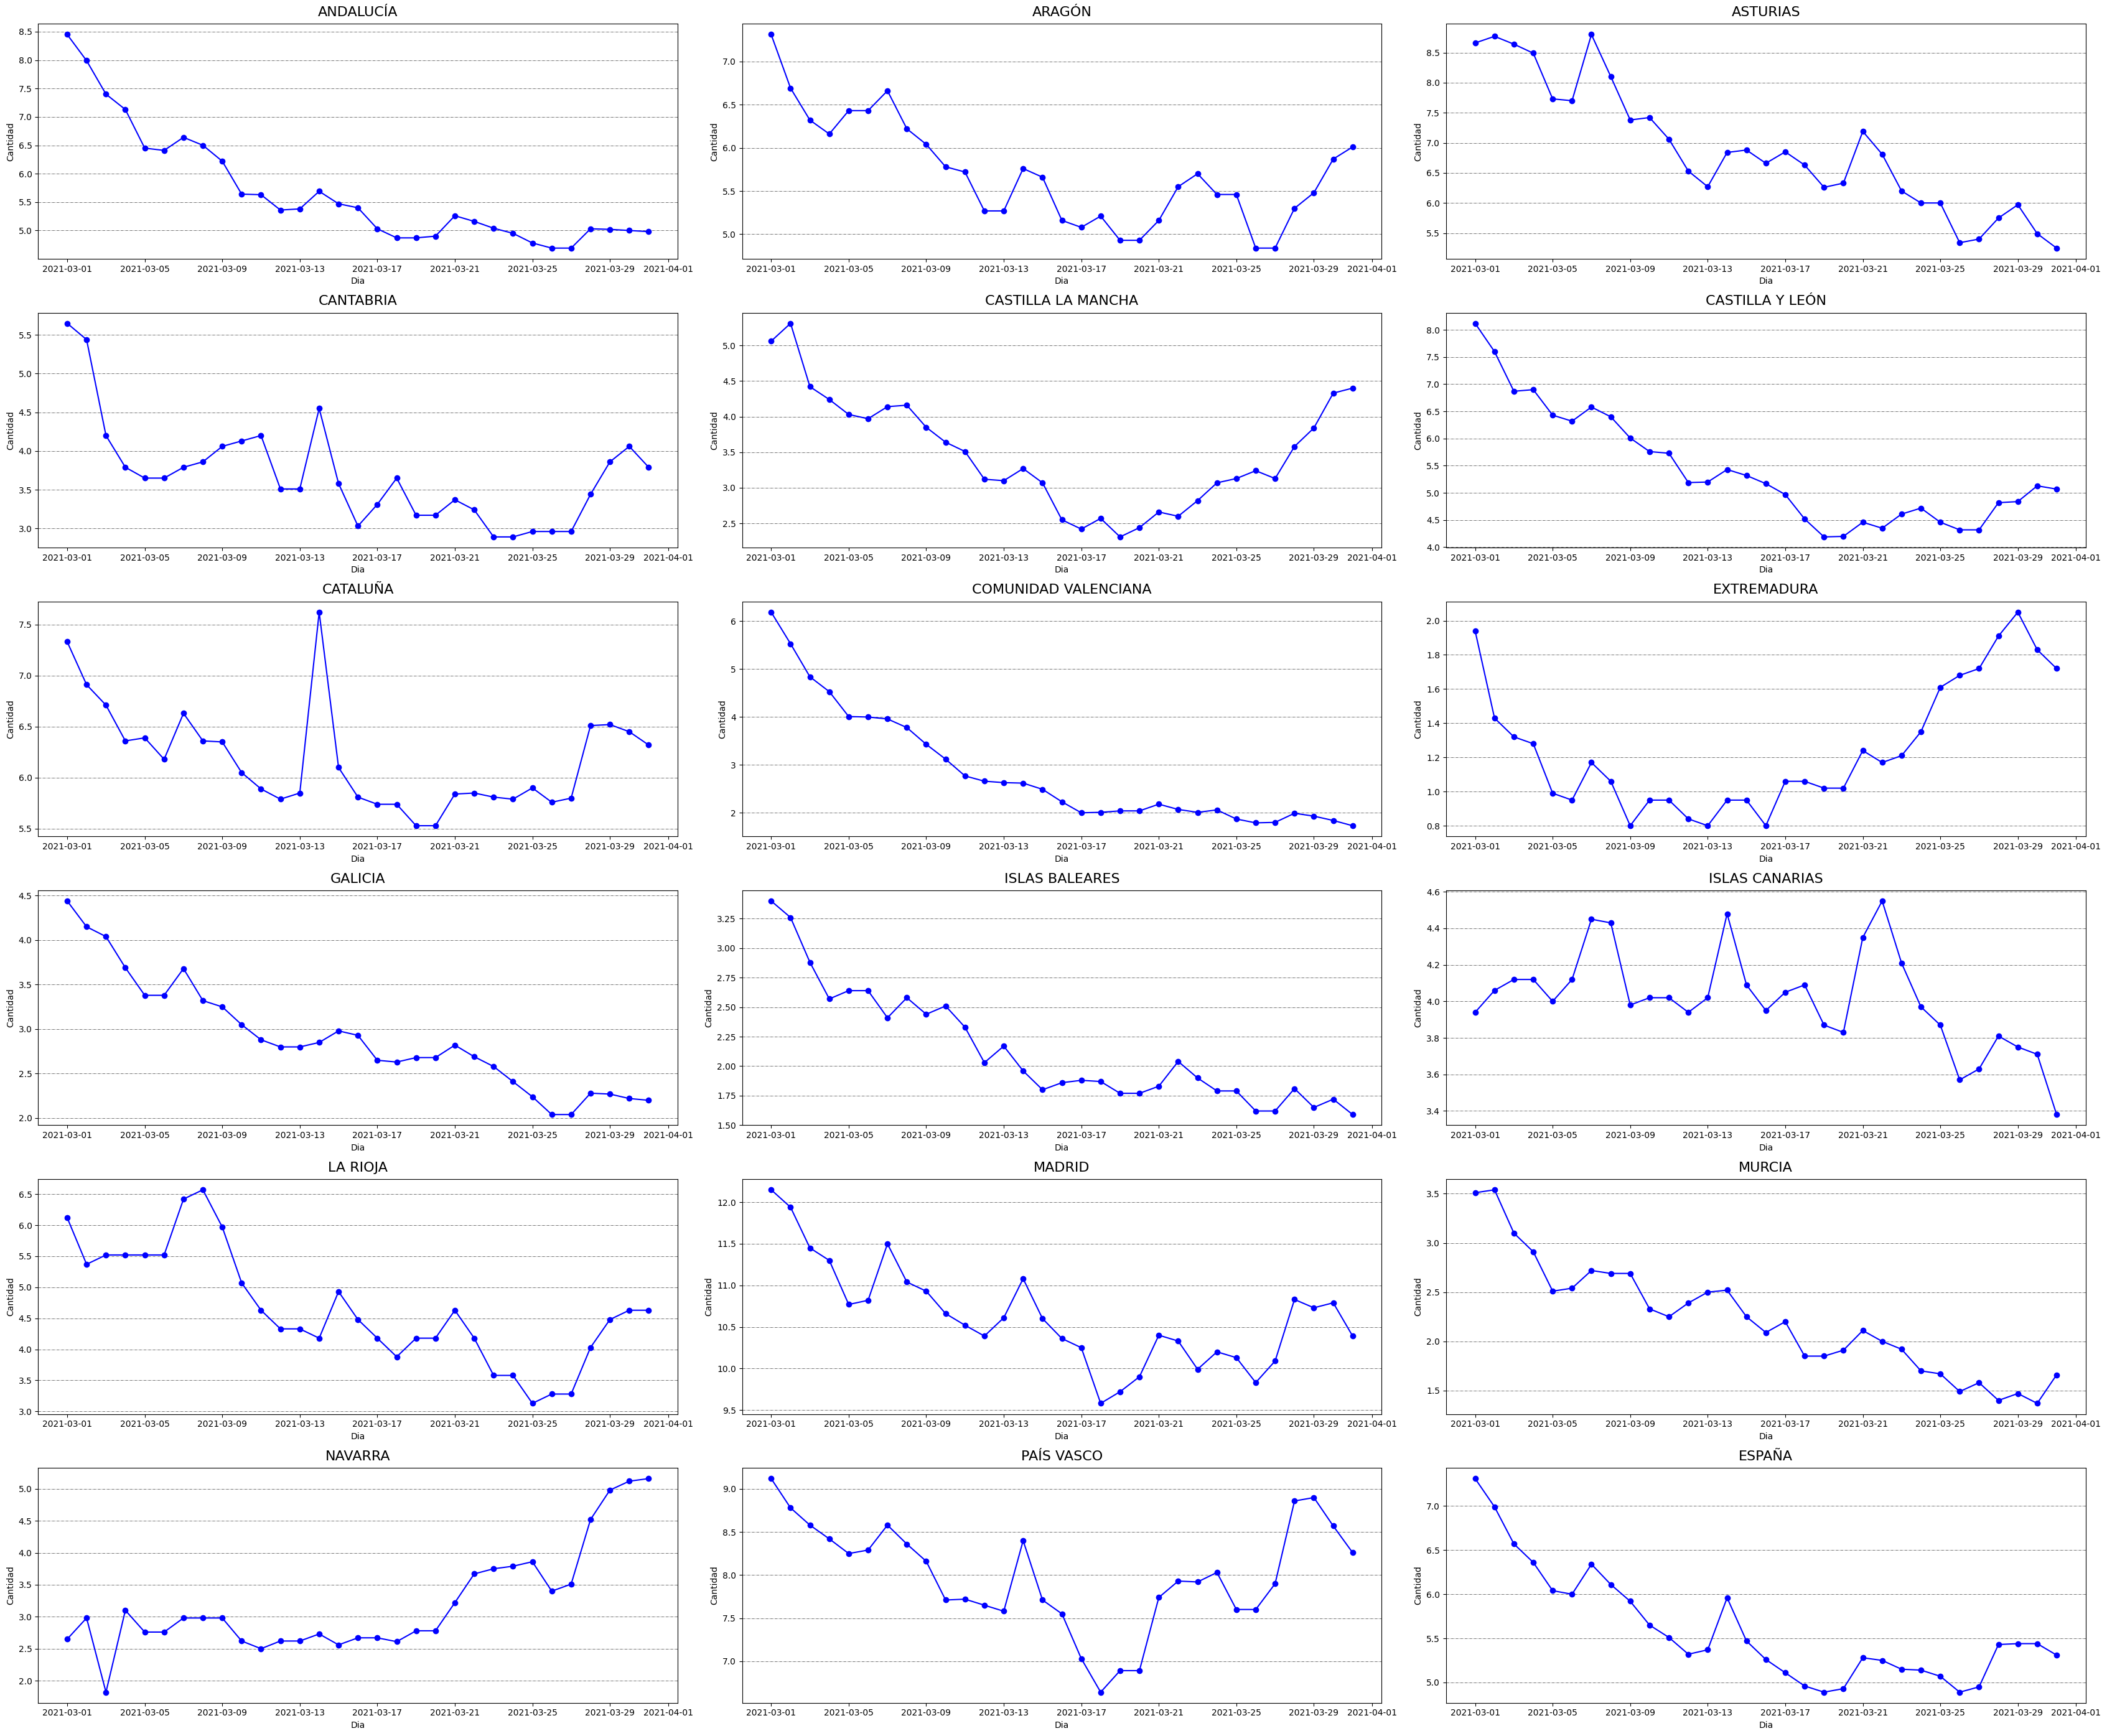

In [46]:
m = 3
year = 2021
fig, ax = plt.subplots(6,3, figsize=(34,28))
lista = r['CCAA'].unique()

for idx, lugar in enumerate(lista):
  a = idx//3
  b = idx % 3
  
  if a < 6:
    graficar(a,b, lugar,m,year)

lugar=0
graficar(5, 2, lugar, m , year)

plt.tight_layout()
#plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

### Se realizó un script que dibuja 18 gráficas de líneas donde se visualice la evolución de la ocupación diaria de un mes determinado de 2022, de camas en UCI ocupadas por enfermos COVID, respecto al total, para cada CCAA (excepto Ceuta y Melilla) y la media española en una matriz de 6x3. Formato AAAA-MM

In [83]:
df = df[~df['COD_CCAA'].isin([18,19])]

In [84]:
r = pd.DataFrame()
r = df[(df['Unidad']=='U. Críticas CON respirador')|(df['Unidad']=='U. Críticas SIN respirador')].groupby(['Fecha','CCAA'])['TOTAL_CAMAS'].sum().reset_index()
r['CAMAS_COVID'] = (df[(df['Unidad']=='U. Críticas CON respirador')|(df['Unidad']=='U. Críticas SIN respirador')].groupby(['Fecha','CCAA'])['OCUPADAS_COVID19'].sum().reset_index())['OCUPADAS_COVID19']

r['Ocupadas%'] = round(r['CAMAS_COVID']*100/r['TOTAL_CAMAS'],2)
r

Fecha                CCAA  TOTAL_CAMAS  CAMAS_COVID  Ocupadas%
0     2020-08-01           ANDALUCÍA       1534.0         15.0       0.98
1     2020-08-01              ARAGÓN        198.0         33.0      16.67
2     2020-08-01            ASTURIAS        254.0          4.0       1.57
3     2020-08-01           CANTABRIA        115.0          0.0       0.00
4     2020-08-01  CASTILLA LA MANCHA        319.0         10.0       3.13
...          ...                 ...          ...          ...        ...
18298 2023-07-13            LA RIOJA         53.0          0.0       0.00
18299 2023-07-13              MADRID        992.0         15.0       1.51
18300 2023-07-13              MURCIA        447.0          3.0       0.67
18301 2023-07-13             NAVARRA         88.0          1.0       1.14
18302 2023-07-13          PAÍS VASCO        348.0          3.0       0.86

[18303 rows x 5 columns]

In [85]:
r_esp = r.groupby('Fecha')['TOTAL_CAMAS'].sum().reset_index()
r_esp.columns.values[1] = 'CAMAS_ESP'
r_esp['CV_ESP']= (r.groupby('Fecha')['CAMAS_COVID'].sum().reset_index())['CAMAS_COVID']
r_esp['ESP%'] = round(r_esp['CV_ESP']*100/r_esp['CAMAS_ESP'], 2)
r_esp

Fecha  CAMAS_ESP  CV_ESP  ESP%
0    2020-08-01     8329.0   250.0  3.00
1    2020-08-02     8277.0   282.0  3.41
2    2020-08-03     8301.0   293.0  3.53
3    2020-08-04     8336.0   311.0  3.73
4    2020-08-05     8333.0   307.0  3.68
...         ...        ...     ...   ...
1072 2023-07-09     8494.0    69.0  0.81
1073 2023-07-10     8503.0    72.0  0.85
1074 2023-07-11     8510.0    76.0  0.89
1075 2023-07-12     8506.0    75.0  0.88
1076 2023-07-13     8497.0    74.0  0.87

[1077 rows x 4 columns]

In [86]:
def graficar(a,b, lugar,m, year):
  #Importante asignarlo a un DATAFRAME NUEVO O VARIABLE. SINO SE APLICA SOBRE EL DF ORIGINAL Y NO EL FILTRADO.
  if (a==5 and b ==2):

    v = (r_esp[(r_esp['Fecha'].dt.month == m) & (r_esp['Fecha'].dt.year == year )][['Fecha','ESP%']])

    ax[a,b].set_title( 'ESPAÑA', fontsize=16, verticalalignment='bottom')
    ax[a,b].set_ylabel('Cantidad')
    ax[a,b].set_xlabel('Dia')
    ax[a,b].grid(axis = 'y', linestyle="-.", linewidth=0.5, color='.25', zorder = -10)
    ax[a,b].plot(v['Fecha'], v['ESP%'], linestyle='-', color='b', zorder=10, marker='o')

  else: 
    v = (r[(r['Fecha'].dt.month == m) & (r['Fecha'].dt.year == year ) & (r['CCAA'] == lugar)][['Fecha','Ocupadas%']])

    ax[a,b].set_title( lugar, fontsize=16, verticalalignment='bottom')
    ax[a,b].set_ylabel('Cantidad')
    ax[a,b].set_xlabel('Dia')
    ax[a,b].grid(axis = 'y', linestyle="-.", linewidth=0.5, color='.25', zorder = -10)

    ax[a,b].plot(v['Fecha'], v['Ocupadas%'], linestyle='-', color='b', zorder=10,marker='o')

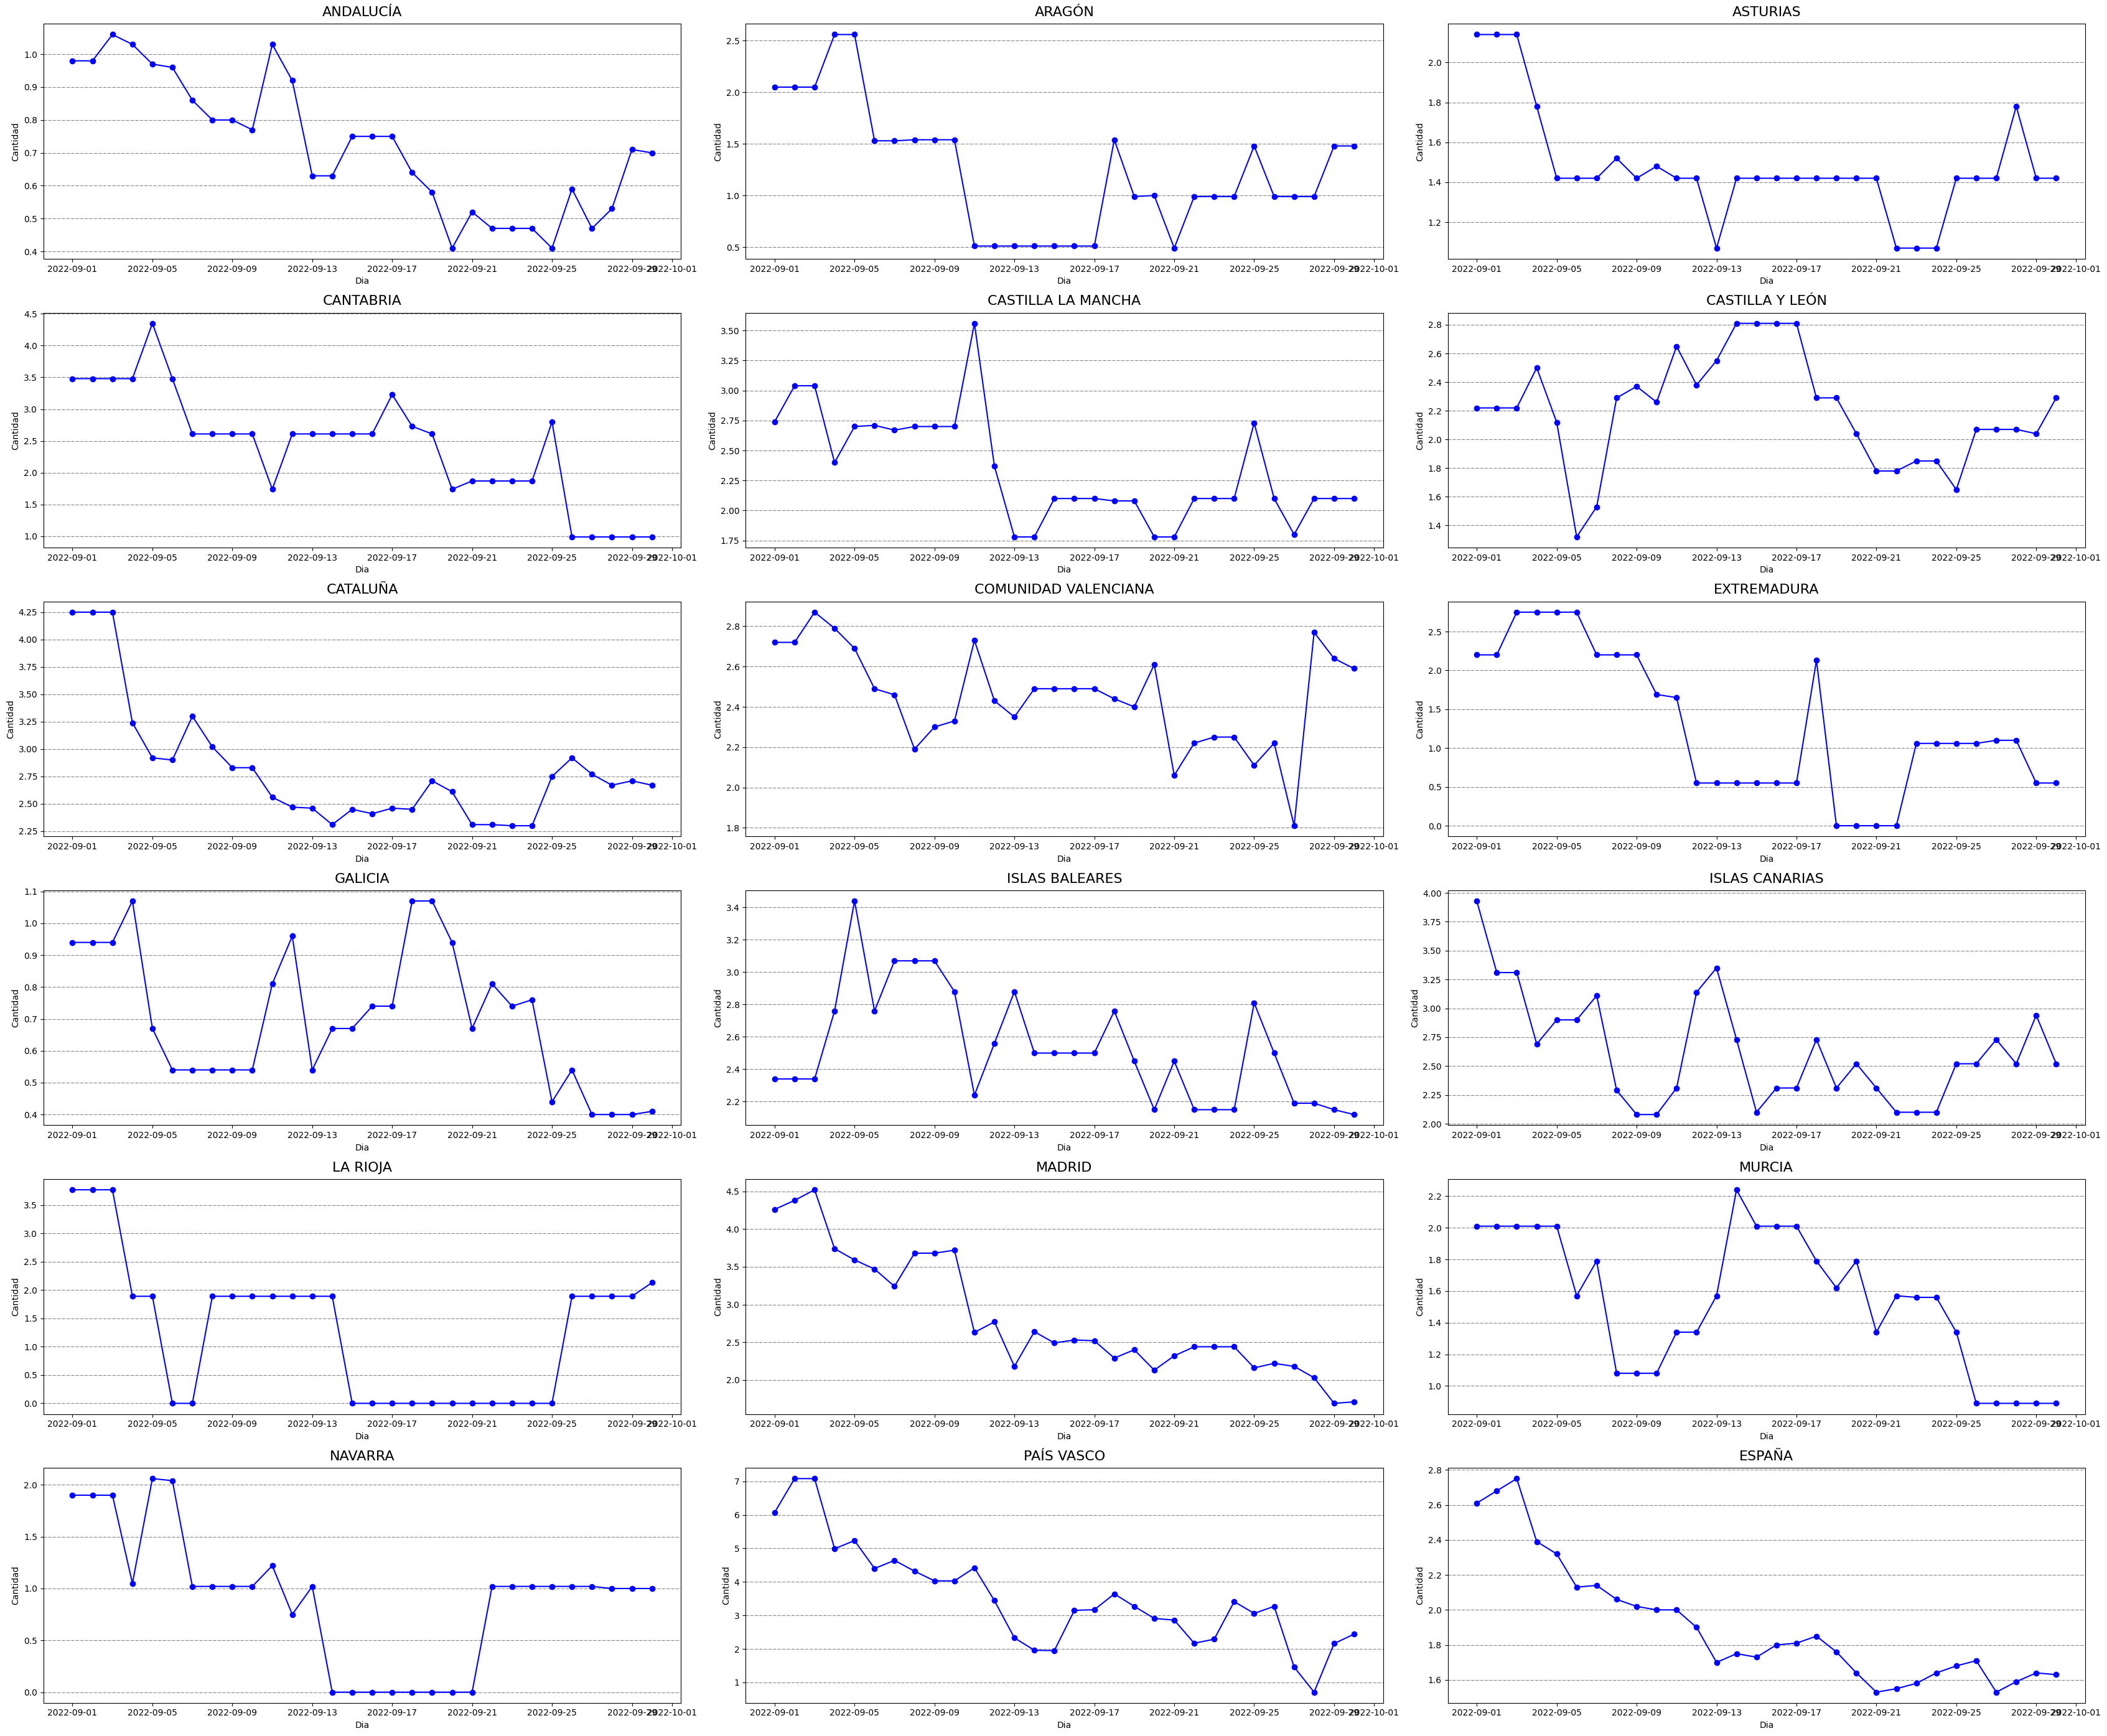

In [90]:
m = 9
year = 2022
fig, ax = plt.subplots(6,3, figsize=(34,28))
lista = r['CCAA'].unique()

for idx, lugar in enumerate(lista):
  a = idx//3
  b = idx % 3
  
  if a < 6:
    graficar(a,b, lugar,m,year)

lugar=0
graficar(5, 2, lugar, m , year)

plt.tight_layout()
#plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

### Se realizó un script que dibuja una gráfica de barras apiladas donde se visualiza la ocupación media de camas en planta y en UCI, respecto al total para todas las CCAA, para un determinado mes (editable).

In [73]:
df = pd.read_csv('C://Users//USER//Desktop//Data Science//edX//DA Python - UNI VALENCIA//Módulo 2//Datos_y_archivos_M2//Datos_Capacidad_Asistencial_Historico.csv', encoding='latin1', sep=';', parse_dates=['Fecha'], dayfirst=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11888\2016581588.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('C://Users//USER//Desktop//Data Science//edX//DA Python - UNI VALENCIA//Módulo 2//Datos_y_archivos_M2//Datos_Capacidad_Asistencial_Historico.csv', encoding='latin1', sep=';', parse_dates=['Fecha'], dayfirst=True)


In [74]:
df.iloc[167802:167810,:]
df = df.drop(df.index[167802:167810])

In [75]:
df.iloc[-5:]

Fecha                      Unidad  COD_CCAA             CCAA  \
167797  13/07/2023  U. Críticas CON respirador       7.0  CASTILLA Y LEÓN   
167798  13/07/2023  U. Críticas CON respirador      12.0          GALICIA   
167799  13/07/2023  U. Críticas SIN respirador      11.0      EXTREMADURA   
167800  13/07/2023  U. Críticas SIN respirador      13.0           MADRID   
167801  13/07/2023  U. Críticas SIN respirador      14.0           MURCIA   

        Cod_Provincia   Provincia  TOTAL_CAMAS  OCUPADAS_COVID19  \
167797           47.0  Valladolid        109.0               1.0   
167798           15.0   Coruña, A        252.0               3.0   
167799            6.0     Badajoz          7.0               0.0   
167800           28.0      Madrid        108.0               0.0   
167801           30.0      Murcia        175.0               2.0   

        CAMAS POR ENFERMOS COVID19*  OCUPADAS_NO_COVID19  INGRESOS_COVID19  \
167797                          0.0                 67.0               0.0   
167798                          2.0                 98.0               1.0   
167799                          0.0                  0.0               0.0   
167800                          0.0                 19.0               0.0   
167801                          0.0                 26.0               0.0   

        ALTAS_24h_COVID19  
167797                0.0  
167798                0.0  
167799                0.0  
167800                0.0  
167801                0.0

In [76]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167802 entries, 0 to 167801
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Fecha                        167802 non-null  datetime64[ns]
 1   Unidad                       167802 non-null  object        
 2   COD_CCAA                     167802 non-null  float64       
 3   CCAA                         167802 non-null  object        
 4   Cod_Provincia                167802 non-null  float64       
 5   Provincia                    167802 non-null  object        
 6   TOTAL_CAMAS                  167802 non-null  float64       
 7   OCUPADAS_COVID19             167802 non-null  float64       
 8   CAMAS POR ENFERMOS COVID19*  167802 non-null  float64       
 9   OCUPADAS_NO_COVID19          167802 non-null  float64       
 10  INGRESOS_COVID19             167802 non-null  float64       
 11  ALTAS_24h_COVID19         

C:\Users\USER\AppData\Local\Temp\ipykernel_11888\3354948855.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')


In [57]:
#Para fecha en español
import calendar, locale
locale.setlocale(locale.LC_ALL,'es-ES')

'es-ES'

In [ ]:
df_2021_meses['CAMAS_OCUPADAS']=df_2021_meses['OCUPADAS_COVID19'] + df_2021_meses['OCUPADAS_NO_COVID19']

ot=pd.DataFrame()
ot = df_2021_meses[(df_2021_meses['Unidad']=='Hospitalización convencional')].groupby(['Fecha','CCAA'])['TOTAL_CAMAS'].mean().reset_index()

ot['CAMAS_OCUPADAS'] = (df_2021_meses[df_2021_meses['Unidad']=='Hospitalización convencional'].
                        groupby(['Fecha','CCAA'])['OCUPADAS_COVID19'].mean().reset_index())['OCUPADAS_COVID19']

ot['Porcentaje']=round(((ot['CAMAS_OCUPADAS']/ot['TOTAL_CAMAS'])*100), 2)

ot['TOTAL_CAMAS_UCI'] = (df_2021_meses[(df_2021_meses['Unidad']=='U. Críticas CON respirador') | (df_2021_meses['Unidad']=='U. Críticas SIN respirador')].
                        groupby(['Fecha','CCAA'])['TOTAL_CAMAS'].mean().reset_index())['TOTAL_CAMAS']
ot['CAMAS_OCUPADAS_UCI'] = (df_2021_meses[(df_2021_meses['Unidad']=='U. Críticas CON respirador') | (df_2021_meses['Unidad']=='U. Críticas SIN respirador')].
                        groupby(['Fecha','CCAA'])['OCUPADAS_COVID19'].mean().reset_index())['OCUPADAS_COVID19']
ot['Porcentaje_UCI']=round(((ot['CAMAS_OCUPADAS_UCI']/ot['TOTAL_CAMAS_UCI'])*100), 2)

ot.head()

Fecha                CCAA  TOTAL_CAMAS  CAMAS_OCUPADAS  Porcentaje  \
0      1           ANDALUCÍA  1958.947581      287.548387       14.68   
1      1              ARAGÓN  1344.182796      170.387097       12.68   
2      1            ASTURIAS  3161.064516      305.967742        9.68   
3      1           CANTABRIA  1488.000000      143.032258        9.61   
4      1  CASTILLA LA MANCHA   944.103226      227.258065       24.07   

   TOTAL_CAMAS_UCI  CAMAS_OCUPADAS_UCI  Porcentaje_UCI  
0       109.175403           25.405242           23.27  
1        39.032258           10.559140           27.05  
2       161.112903           33.225806           20.62  
3        61.387097           13.806452           22.49  
4        42.754839           17.664516           41.32

Recordar que la diferencia entre porcentajes que me salía era por la interpretación:
- OCUPADAS SE TOMABA COMO OCUPADAS_COVID
- Yo lo tomé como COVID19 + NOCOVID19
- POR ESO SALIAN VALORES DISTINTOS, PERO YA ESTA CORREGIDO

In [78]:
#df_2022 = df[df['Fecha'].dt.year == 2021].copy().reset_index(drop=True)
df_2022 = df[(df['Fecha']>='2021-01-01') & (df['Fecha']<='2021-12-31')].copy()
df_2022.Fecha = df_2022.Fecha.dt.month

df_2022['OCUPADAS'] = df_2022['OCUPADAS_COVID19']+df_2022['OCUPADAS_NO_COVID19']
#PLANTA
df1 = pd.DataFrame()
df1 = df_2022[df_2022['Unidad'] == 'Hospitalización convencional'].groupby(['Fecha', 'CCAA'])['OCUPADAS'].mean().reset_index()

df1['TOTAL_CAMAS'] = (df_2022[df_2022['Unidad'] == 'Hospitalización convencional'].groupby(['Fecha', 'CCAA'])['TOTAL_CAMAS'].mean().reset_index())['TOTAL_CAMAS']
df1['PorcentajePlanta'] = round(df1['OCUPADAS']*100/df1['TOTAL_CAMAS'], 2) 

#UCI
df1['OCUPADAS_UCI'] = (df_2022[(df_2022['Unidad'] == 'U. Críticas CON respirador')|(df_2022['Unidad'] == 'U. Críticas SIN respirador')].groupby(['Fecha', 'CCAA'])['OCUPADAS'].mean().reset_index())['OCUPADAS']
df1['TOTAL_CAMAS_UCI'] = (df_2022[(df_2022['Unidad'] == 'U. Críticas CON respirador')|(df_2022['Unidad'] == 'U. Críticas SIN respirador')].groupby(['Fecha', 'CCAA'])['TOTAL_CAMAS'].mean().reset_index())['TOTAL_CAMAS']
df1['PorcentajeUCI'] = round(df1['OCUPADAS_UCI']*100/df1['TOTAL_CAMAS_UCI'], 2)
df1.head()

Fecha                CCAA     OCUPADAS  TOTAL_CAMAS  PorcentajePlanta  \
0      1           ANDALUCÍA  1303.052419  1958.947581             66.52   
1      1              ARAGÓN   884.881720  1344.182796             65.83   
2      1            ASTURIAS  2162.709677  3161.064516             68.42   
3      1           CANTABRIA   951.193548  1488.000000             63.92   
4      1  CASTILLA LA MANCHA   642.483871   944.103226             68.05   

   OCUPADAS_UCI  TOTAL_CAMAS_UCI  PorcentajeUCI  
0     47.493952       109.175403          43.50  
1     22.806452        39.032258          58.43  
2     54.370968       161.112903          33.75  
3     30.467742        61.387097          49.63  
4     25.722581        42.754839          60.16

In [79]:
df_2022 = df[df['Fecha'].dt.year == 2022].copy().reset_index(drop=True)
#df_2022 = df[(df['Fecha']>='2021-01-01') & (df['Fecha']<='2021-12-31')].copy()
df_2022.Fecha = df_2022.Fecha.dt.month

df_2022['OCUPADAS'] = df_2022['OCUPADAS_COVID19']+df_2022['OCUPADAS_NO_COVID19']
#PLANTA
df1 = pd.DataFrame()
df1 = df_2022[df_2022['Unidad'] == 'Hospitalización convencional'].groupby(['Fecha', 'CCAA'])['OCUPADAS_COVID19'].mean().reset_index()

df1['TOTAL_CAMAS'] = (df_2022[df_2022['Unidad'] == 'Hospitalización convencional'].groupby(['Fecha', 'CCAA'])['TOTAL_CAMAS'].mean().reset_index())['TOTAL_CAMAS']
df1['PorcentajePlanta'] = round(df1['OCUPADAS_COVID19']*100/df1['TOTAL_CAMAS'], 2) 

#UCI
df1['OCUPADAS_UCI'] = (df_2022[(df_2022['Unidad'] == 'U. Críticas CON respirador')|(df_2022['Unidad'] == 'U. Críticas SIN respirador')].groupby(['Fecha', 'CCAA'])['OCUPADAS_COVID19'].mean().reset_index())['OCUPADAS_COVID19']
df1['TOTAL_CAMAS_UCI'] = (df_2022[(df_2022['Unidad'] == 'U. Críticas CON respirador')|(df_2022['Unidad'] == 'U. Críticas SIN respirador')].groupby(['Fecha', 'CCAA'])['TOTAL_CAMAS'].mean().reset_index())['TOTAL_CAMAS']
df1['PorcentajeUCI'] = round(df1['OCUPADAS_UCI']*100/df1['TOTAL_CAMAS_UCI'], 2)
df1.head()

Fecha                CCAA  OCUPADAS_COVID19  TOTAL_CAMAS  PorcentajePlanta  \
0      1           ANDALUCÍA        204.294355  1962.959677             10.41   
1      1              ARAGÓN        225.860215  1309.634409             17.25   
2      1            ASTURIAS        354.161290  3184.451613             11.12   
3      1           CANTABRIA        181.645161  1388.387097             13.08   
4      1  CASTILLA LA MANCHA        105.174194   914.890323             11.50   

   OCUPADAS_UCI  TOTAL_CAMAS_UCI  PorcentajeUCI  
0     14.310484       112.737903          12.69  
1     11.424731        37.596774          30.39  
2     26.306452       152.322581          17.27  
3     12.822581        59.000000          21.73  
4      6.667742        35.490323          18.79

In [80]:
meses=12
df2 = (df1[df1['Fecha'] == meses])[['CCAA','PorcentajePlanta','PorcentajeUCI']]
df2

CCAA  PorcentajePlanta  PorcentajeUCI
209             ANDALUCÍA              1.72           1.47
210                ARAGÓN              2.24           1.16
211              ASTURIAS              2.47           1.73
212             CANTABRIA              5.52           3.89
213    CASTILLA LA MANCHA              2.87           1.72
214       CASTILLA Y LEÓN              3.46           2.63
215              CATALUÑA              4.55           6.36
216                 CEUTA              1.44           0.00
217  COMUNIDAD VALENCIANA              3.45           2.59
218           EXTREMADURA              0.90           0.28
219               GALICIA              2.55           0.69
220        ISLAS BALEARES              2.42           1.42
221        ISLAS CANARIAS              5.21           3.85
222              LA RIOJA              3.06           4.63
223                MADRID              3.78           4.13
224               MELILLA              2.97           9.14
225                MURCIA              2.89           0.99
226               NAVARRA              2.50           1.13
227            PAÍS VASCO              4.89           4.60

In [81]:
def crear_Grafica (a,b,meses):
    df2 = pd.DataFrame()
    df2 = (df1[df1['Fecha'] == meses])[['CCAA','PorcentajePlanta','PorcentajeUCI']]

    ax[a,b].set_title('Mes: '+ str(meses) , fontsize=16, verticalalignment='bottom')
    ax[a,b].set_ylabel('Porcentaje')
    ax[a,b].set_xlabel('Lugares')
    ax[a,b].grid(linestyle="-.", linewidth=0.5, color='.25', zorder = -10)

    #AJUSTE DE POSICIÓN Y CON LABEL EL NOMBRE
    ax[a,b].set_xticks(indice + ancho)
    ax[a,b].set_xticklabels(df2['CCAA'], rotation=90)
    
    ax[a,b].bar(indice, df2['PorcentajePlanta'], width=ancho, label="Planta", align='edge', color='b')
    ax[a,b].bar(indice+ancho, df2['PorcentajeUCI'], width=ancho, label="UCI", align='edge', color='orange')
    ax[a,b].legend()


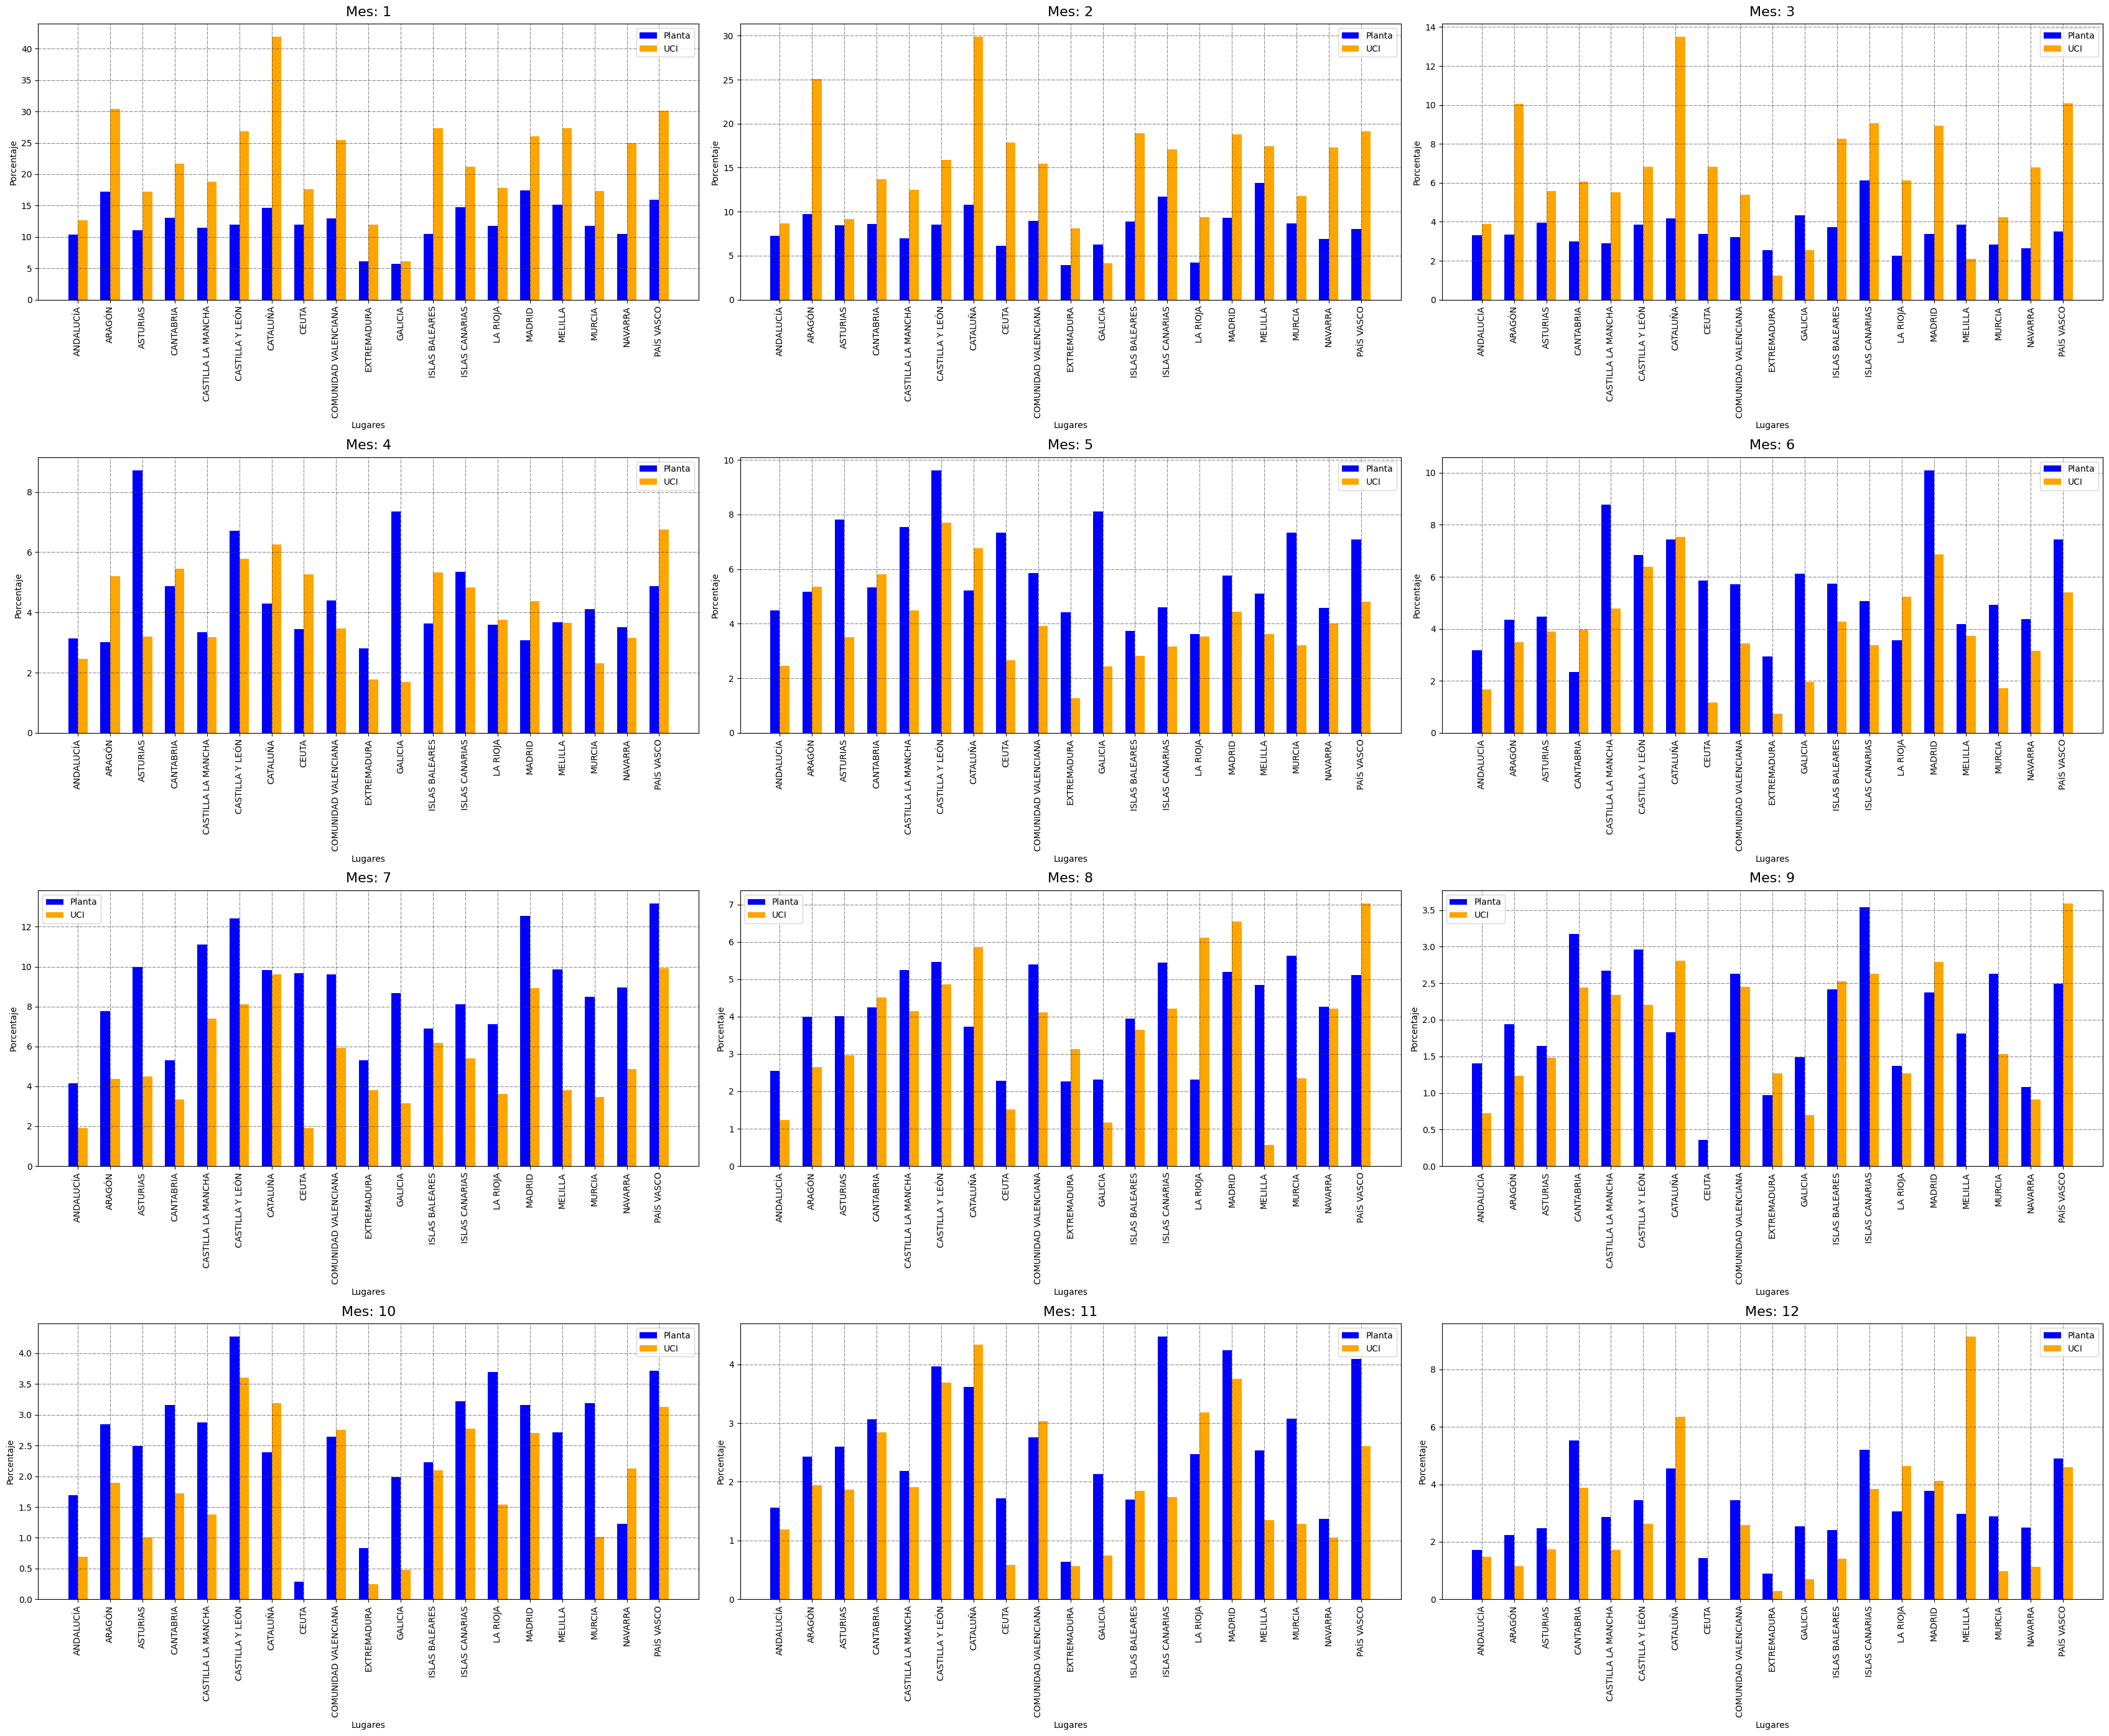

In [82]:
ancho = 0.30
indice = np.arange(19)
lista= df1['Fecha'].unique()

fig, ax = plt.subplots(4,3, figsize=(34,28))

for idx, meses in enumerate(lista):
    a = idx//3
    b = idx % 3
    if a<4:
        crear_Grafica(a,b,meses)

plt.tight_layout()
#plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()
